# **Eat OUT Recommendation System**

##### **Group 1 (i.e. Foodies) members**:
<ul type='square'> 
    <li> David Mwiti</li>
    <li> Karen Amanya</li>
    <li> Mercy Onduso </li>
    <li> Nicholus Magak </li>
    <li> Penina Wanyama </li>
    <li> Stephen Thuo </li>
</ul>

# 1. Business Understanding

## **Overview**
A content recommender system is a type of artificial intelligence that uses algorithms to recommend content or items to users based on their interests, preferences, and behaviours. It is commonly used by businesses to personalize user experiences and increase engagement and revenue.
In the context of EatOut, a content recommender system could be used to recommend eateries and hotels to users based on specific keywords and explicit feedback from other users. The system could analyse a user's browsing behaviour and past interactions with the EatOut website to provide personalized recommendations that match their preferences and needs. The system could also consider the ratings and reviews of other users who have similar interests and preferences, providing a more accurate and relevant set of recommendations.
The key benefit of a content recommender system is that it provides users with a more personalized and efficient way of finding relevant content, leading to increased engagement and customer loyalty. It also enables businesses to target their marketing efforts more effectively, resulting in higher revenue and profitability.


### **Problem Statement**
EatOut is a media and food tech company that operates mainly in Kenya and East Africa. Its establishment dates to 2010, and it provides customers with the ability to browse through numerous eateries, providing crucial data like menus, contacts, maps, events, reviews, and pictures. With the advent of social media, many people rely on influencer and user-generated recommendations on platforms like Instagram and TikTok because they offer a more personalized assessment of the restaurant's ambiance, service, and food, compared to a traditional rating system. Consequently, many restaurants and hotels are using these platforms as marketing tools, which is affecting the website visits and revenue of food tech businesses such as EatOut. However, they can enhance their competitive advantage by creating a more customized feel to their website. This would help users find eateries and hotels based on criteria beyond cuisine or ratings. A content recommender system, which considers explicit feedback from other users, rather than the standard similarity-based approach, could help. With this system, users can easily find relevant recommendations based on specific keywords, thus avoiding the need to browse through countless items.


### **Objectives**

> **General Objective:**

To improve the competitive advantage of EatOut by developing a content recommender system that provides users with customized recommendations based on specific keywords and explicit feedback from other users.
> **Specific Objectives:**

1.	To analyse the current browsing behaviour of EatOut users and identify the limitations of the traditional rating system.
2.	To develop a content recommender system that incorporates explicit feedback from other users and considers keywords beyond cuisine or ratings.
3.	To test the performance of the recommender system in terms of accuracy and efficiency in providing personalized recommendations to users.
4.	To integrate the recommender system into the EatOut website and provide a user-friendly interface for users to access and interact with the system.
5.	To evaluate the impact of the recommender system on the website visits and revenue of EatOut.


> **Research Questions:**

1.	What are the limitations of the traditional rating system used by EatOut?
2.	How can explicit feedback from other users be incorporated into a content recommender system for EatOut?
3.	How accurate and efficient is the proposed recommender system in providing personalized recommendations to users based on specific keywords?
4.	How can the recommender system be integrated into the EatOut website, and what features should be included to make it user-friendly?
5.	What is the impact of the recommender system on the website visits and revenue of EatOut, and how does it compare to the traditional rating system?



### **Success Criteria**

The project will be successful if the content recommender system developed is effective in enhancing the competitive advantage of EatOut by providing users with a more personalized and efficient way of finding relevant eateries and hotels, leading to increased user engagement, customer loyalty, and revenue. Success metrics are : M.A.E & R.M.S.E. Precisely, at the end we should have:
1.	A successful analysis of the current browsing behaviour of EatOut users and identification of the limitations of the traditional rating system.
2.	Successful development and implementation of a content recommender system that incorporates explicit feedback from other users and considers keywords beyond cuisine or ratings.
3.	High accuracy and efficiency of the proposed recommender system in providing personalized recommendations to users based on specific keywords.
4.	Successful integration of the recommender system into the EatOut website and user-friendly interface for users to access and interact with the system.



#### **Importing the required libraries**

In [1]:
# loading libraries
import pickle
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config inlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')

from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import folium

from ast import literal_eval
from dataprep.clean import clean_country
import pycountry 
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
import sidetable
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import operator
from sklearn import metrics, preprocessing
from tensorflow.keras import models, layers, utils
from tensorflow.keras.optimizers.legacy import Adam
import tensorflow as tf

from sklearn.metrics import accuracy_score

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

# download nltk packages
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\GM\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GM\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import datetime
import os

#### **Loading the data**

##### _**1. restaurants_df**_

In [3]:
restaurant_df = pd.read_csv('restaurant_data.csv', encoding='utf-8', on_bad_lines='skip', low_memory=False)
restaurant_df.head()

,Name,Rating,Pricing,URL,Latitude,Longitude,Transactions,Location,Phone,Display Phone,Distance,Reviews,Review Count,Cuisine,Restaurant ID,Number of Reviews
0,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.995970,"['delivery', 'pickup', 'restaurant_reservation']","35 W 13th St, New York, NY 10011",1.212367e+10,(212) 367-1979,3526.365252,[{'text': 'This small and crowded place seems ...,3,"I, t, a, l, i, a, n",hdiuRS9sVZSMReZm4oV5SA,1851
1,LoveMama,5,$$,https://www.yelp.com/biz/lovemama-new-york?adj...,40.730409,-73.986127,"['delivery', 'pickup', 'restaurant_reservation']","174 2nd Ave, New York, NY 10003",1.212255e+10,(212) 254-5370,2645.074283,[{'text': 'Absolutely LOVED LoveMama!! As a co...,3,"T, h, a, i",jjJc_CrkB2HodEinB6cWww,6377
2,Ye's Apothecary,5,$$$,https://www.yelp.com/biz/yes-apothecary-new-yo...,40.719450,-73.989800,[],"119 Orchard St, New York, NY 10002",NaN,NaN,1638.756115,[{'text': 'Edy and Josh are the BEST bartender...,3,"S, z, e, c, h, u, a, n",8YWLuLUKj0t_0_Xv06UUtw,212
3,Joe's Shanghai,4,$$,https://www.yelp.com/biz/joes-shanghai-new-yor...,40.715661,-73.996701,"['delivery', 'pickup']","46 Bowery St, New York, NY 10013",1.212234e+10,(212) 233-8888,1766.176007,[{'text': 'This is the third stop of our food ...,3,"S, h, a, n, g, h, a, i, n, e, s, e",0CjK3esfpFcxIopebzjFxA,7098
4,Antidote,4,$$,https://www.yelp.com/biz/antidote-brooklyn-2?a...,40.714253,-73.965448,"['delivery', 'pickup']","66 S 2nd St, Brooklyn, NY 11249",1.718782e+10,(718) 782-2585,1376.494330,[{'text': 'Excellent service & food! The drink...,3,"C, o, c, k, t, a, i, l, , B, a, r, s",4DInnPhOyvXFbYpUdO0SMQ,325


##### _**2. users_df**_

In [4]:
user_revs_df = pd.read_csv('final_revs.csv', encoding='utf-8', on_bad_lines='skip', low_memory=False, header=None)
columns=['User_Name','Account','Location','Date_of_review','Rating','Comment','URL']
user_revs_df.columns = columns
user_revs_df.head()

,User_Name,Account,Location,Date_of_review,Rating,Comment,URL
0,Richard D.,/user_details?userid=pRfWy61wU9e1nrCVrOEWLA,"New York, NY",2/16/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
1,Elisa H.,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,"Brooklyn, NY",1/6/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
2,Morlene C.,/user_details?userid=VLTBPUrbNRR-f84h-altQw,"Brooklyn, NY",12/15/2022,3.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
3,Ruwan J.,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,"New York, NY",3/23/2023,4.0,Urbanspace Union Square is a newish addition-...,https://www.yelp.com/biz/urbanspace-union-squa...
4,Mike C.,/user_details?userid=37cpUoM8hlkSQfReIEBd-Q,"Forest Hills, NY",12/14/2022,5.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...


<hr>

# 2. Data Understanding

The data being used on this project was object after scraping on Yelp. It is meant to be used as a mockup for how Eat Out's data could look like on the probability our recommender is accepted.

The data contained two files: 

* **_restaurants.csv_**

Contained the restaurants we desired to recommend. A few notable features in the dataset are name(of restaurant), avg_rating, pricing_range, & cuisine. Regional data we have is from New York hence there is a location field with the restaurants' individual locs.

* **_final_revs.csv_**

Contained user info from the individual restaurants. Users have identification  based on their account links. Other features include (Username, date of review, individual rating). We were also able to acquire comments from users which can be used to give restaurants more context. 


##### _**1. restaurants_df**_

In [5]:
restaurant_df.info()

# Observations:
#   16 columns & 500 rows
#   It has some missing phone & display phone numbers
#   Missing quite a bit of data on the pricing section

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               500 non-null    object 
 1   Rating             500 non-null    int64  
 2   Pricing            315 non-null    object 
 3   URL                500 non-null    object 
 4   Latitude           500 non-null    float64
 5   Longitude          500 non-null    float64
 6   Transactions       500 non-null    object 
 7   Location           500 non-null    object 
 8   Phone              430 non-null    float64
 9   Display Phone      430 non-null    object 
 10  Distance           500 non-null    float64
 11  Reviews            500 non-null    object 
 12  Review Count       500 non-null    int64  
 13  Cuisine            500 non-null    object 
 14  Restaurant ID      500 non-null    object 
 15  Number of Reviews  500 non-null    int64  
dtypes: float64(4), int64(3), o

In [6]:
# Converting the cuisine text to a more human readable format
restaurant_df['Cuisine'] = restaurant_df['Cuisine'].apply(lambda x: [x])
restaurant_df['Cuisine'] = restaurant_df['Cuisine'].apply(lambda x: ''.join(x))
restaurant_df['Cuisine'] = restaurant_df['Cuisine'].apply(lambda x: x.replace('  ', '-'))
restaurant_df['Cuisine'] = restaurant_df['Cuisine'].apply(lambda x: x.replace(',', ''))
restaurant_df['Cuisine'] = restaurant_df['Cuisine'].apply(lambda x: x.replace(' ', ''))
restaurant_df['Cuisine'] = restaurant_df['Cuisine'].apply(lambda x: x.replace('-', ' '))

In [7]:
restaurant_df['Cuisine'].head()

0          Italian
1             Thai
2         Szechuan
3     Shanghainese
4    Cocktail Bars
Name: Cuisine, dtype: object

In [8]:
# viewing the number of unique restaurants
len(restaurant_df['Restaurant ID'].unique())

435

In [9]:
# Types of transactions occuring in the restaurants
set(restaurant_df['Transactions'])

{"['delivery', 'pickup', 'restaurant_reservation']",
 "['delivery', 'pickup']",
 "['delivery']",
 "['pickup', 'delivery', 'restaurant_reservation']",
 "['pickup', 'delivery']",
 "['pickup', 'restaurant_reservation', 'delivery']",
 "['restaurant_reservation', 'delivery', 'pickup']",
 "['restaurant_reservation', 'delivery']",
 "['restaurant_reservation']",
 '[]'}

In [10]:
# viewing the rating scale of the restaurants
set(restaurant_df['Rating'])

{1, 2, 3, 4, 5}

##### _**2. users_df**_

In [11]:
user_revs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127239 entries, 0 to 127238
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   User_Name       127239 non-null  object 
 1   Account         127239 non-null  object 
 2   Location        127239 non-null  object 
 3   Date_of_review  127239 non-null  object 
 4   Rating          127239 non-null  float64
 5   Comment         127239 non-null  object 
 6   URL             127239 non-null  object 
dtypes: float64(1), object(6)
memory usage: 6.8+ MB


In [12]:
# Checking how many unique users rated
len(user_revs_df['Account'].unique())

90324

In [13]:
user_revs_df.describe()

,Rating
count,127239.000000
mean,4.146968
std,1.130784
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


<hr>

# EDA

In [14]:
#merge the two datasets
user_restaurant_df = pd.merge(user_revs_df, restaurant_df, on='URL', how='left')
user_restaurant_df.head(3)

,User_Name,Account,Location_x,Date_of_review,Rating_x,Comment,URL,Name,Rating_y,Pricing,...,Transactions,Location_y,Phone,Display Phone,Distance,Reviews,Review Count,Cuisine,Restaurant ID,Number of Reviews
0,Richard D.,/user_details?userid=pRfWy61wU9e1nrCVrOEWLA,"New York, NY",2/16/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,Urbanspace Union Square,3.0,NaN,...,[],"124 E 14th St, New York, NY 10003",1.716466e+10,(716) 466-2713,3040.701171,[{'text': 'Yet another food hall opens up. The...,3.0,Food Court,JjomQ2VCojutXJQeGVt-QA,13.0
1,Elisa H.,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,"Brooklyn, NY",1/6/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,Urbanspace Union Square,3.0,NaN,...,[],"124 E 14th St, New York, NY 10003",1.716466e+10,(716) 466-2713,3040.701171,[{'text': 'Yet another food hall opens up. The...,3.0,Food Court,JjomQ2VCojutXJQeGVt-QA,13.0
2,Morlene C.,/user_details?userid=VLTBPUrbNRR-f84h-altQw,"Brooklyn, NY",12/15/2022,3.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,Urbanspace Union Square,3.0,NaN,...,[],"124 E 14th St, New York, NY 10003",1.716466e+10,(716) 466-2713,3040.701171,[{'text': 'Yet another food hall opens up. The...,3.0,Food Court,JjomQ2VCojutXJQeGVt-QA,13.0


In [15]:
user_restaurant_df.columns

Index(['User_Name', 'Account', 'Location_x', 'Date_of_review', 'Rating_x',
       'Comment', 'URL', 'Name', 'Rating_y', 'Pricing', 'Latitude',
       'Longitude', 'Transactions', 'Location_y', 'Phone', 'Display Phone',
       'Distance', 'Reviews', 'Review Count', 'Cuisine', 'Restaurant ID',
       'Number of Reviews'],
      dtype='object')

The 'Account' Column is the unique identifier for the users,
'Location_x' is the location of the restaurant where the users dined. The 'Date_of_review' column is when the user made the reviews for the restaurant. The 'Rating_x' is the ratings by user. The 'Comment' is the various comments by the user. The 'URL' is the unique identifier of the restaurant. 'Rating_y' is the average ratings the rstaurant received from the various users. 'Pricing' is used to identify the various levels of the restaurant(high-end, middle-class, affordable, cheap). The 'Transactions" is used to specify which services are offfered by the restaurant. 'Location_y' is the restaurant's location. 'Reviews' column is the various reviews the restaurant received

In [16]:
# renaming columns
user_restaurant_df.rename(columns={'Account': 'user_ID', 'Rating_x': 'user_rating', 'Rating_y': 'avg_restaurant_rating',
                                    'Cuisine': 'cuisine', 'Pricing': 'pricing', 
                                    'URL': 'url', 'Location_x': 'location', 
                                    'Restaurant ID': 'id', 'Date_of_review': 'review_date', 
                                    'Transactions': 'transactions', 'Number of Reviews':'number_of_reviews',
                                   'Comment': 'comments', 'Reviews': 'reviews'}, inplace=True)

In [17]:
#Drop unnecessary columns
unnecessary_columns = ['User_Name', 'Name', 'Phone', 'Display Phone', 'Distance', 'Location_y',
                       'Review Count']
user_restaurant_df = user_restaurant_df.drop(unnecessary_columns, axis =1)
user_restaurant_df.head(3)

,user_ID,location,review_date,user_rating,comments,url,avg_restaurant_rating,pricing,Latitude,Longitude,transactions,reviews,cuisine,id,number_of_reviews
0,/user_details?userid=pRfWy61wU9e1nrCVrOEWLA,"New York, NY",2/16/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,NaN,40.733618,-73.988511,[],[{'text': 'Yet another food hall opens up. The...,Food Court,JjomQ2VCojutXJQeGVt-QA,13.0
1,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,"Brooklyn, NY",1/6/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,NaN,40.733618,-73.988511,[],[{'text': 'Yet another food hall opens up. The...,Food Court,JjomQ2VCojutXJQeGVt-QA,13.0
2,/user_details?userid=VLTBPUrbNRR-f84h-altQw,"Brooklyn, NY",12/15/2022,3.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,NaN,40.733618,-73.988511,[],[{'text': 'Yet another food hall opens up. The...,Food Court,JjomQ2VCojutXJQeGVt-QA,13.0


In [18]:
user_restaurant_df.stb.missing()

,missing,total,percent
pricing,20966,139112,15.071309
avg_restaurant_rating,14019,139112,10.077492
Latitude,14019,139112,10.077492
Longitude,14019,139112,10.077492
transactions,14019,139112,10.077492
reviews,14019,139112,10.077492
cuisine,14019,139112,10.077492
id,14019,139112,10.077492
number_of_reviews,14019,139112,10.077492
user_ID,0,139112,0.000000


From the table above, we can see the missing values in the various columns: Pricing has missing values at 27.97%, while transactions, reviews ,avg_restaurant_rating and cuisine and ID have missing values at 20.56%, The pricing col is categorical, and the missing values can be replaced by the mode. The other columns with missing values can be either be dropped or replaced

In [19]:
# Since pricing categorical data, we can use mode
user_restaurant_df['pricing'] = user_restaurant_df['pricing'].fillna(user_restaurant_df['pricing'].mode()[0])
# Empty transactions filled with None
user_restaurant_df['transactions'] = user_restaurant_df['transactions'].fillna(user_restaurant_df['transactions'].mode()[0])
# Missing Cuisines filled with a random one
user_restaurant_df['cuisine'] = user_restaurant_df['cuisine'].fillna('random')
# Missing average rating filled with the mode
user_restaurant_df['avg_restaurant_rating'] = user_restaurant_df['avg_restaurant_rating'].fillna(user_restaurant_df['avg_restaurant_rating'].mode()[0])
# Missing review filled with no reviews
user_restaurant_df['reviews'] = user_restaurant_df['reviews'].fillna('no reviews')
# Missing id filled with no identifier
user_restaurant_df['id'] = user_restaurant_df['id'].fillna('no identifier')

In [20]:
user_restaurant_df.stb.missing()

,missing,total,percent
Latitude,14019,139112,10.077492
Longitude,14019,139112,10.077492
number_of_reviews,14019,139112,10.077492
user_ID,0,139112,0.000000
location,0,139112,0.000000
review_date,0,139112,0.000000
user_rating,0,139112,0.000000
comments,0,139112,0.000000
url,0,139112,0.000000
avg_restaurant_rating,0,139112,0.000000


In [21]:
user_restaurant_df.dtypes

user_ID                   object
location                  object
review_date               object
user_rating              float64
comments                  object
url                       object
avg_restaurant_rating    float64
pricing                   object
Latitude                 float64
Longitude                float64
transactions              object
reviews                   object
cuisine                   object
id                        object
number_of_reviews        float64
dtype: object

In [22]:
# Converting the columns to lower case
user_restaurant_df['url'] = user_restaurant_df['url'].str.lower()
user_restaurant_df['location'] = user_restaurant_df['location'].str.lower()
user_restaurant_df['cuisine'] = user_restaurant_df['cuisine'].str.lower()
user_restaurant_df['comments'] = user_restaurant_df['comments'].str.lower()

user_restaurant_df.sample(5)

,user_ID,location,review_date,user_rating,comments,url,avg_restaurant_rating,pricing,Latitude,Longitude,transactions,reviews,cuisine,id,number_of_reviews
51610,/user_details?userid=VqMfGzsjbRICgzIZob4ZOQ,"san francisco, ca",7/4/2014,5.0,i went to brunch today and it was my cousin's ...,https://www.yelp.com/biz/cookshop-new-york?adj...,4.0,$$,40.745732,-74.005405,"['delivery', 'pickup']",[{'text': 'Came here after doing a Peloton cla...,american (new),ssGhu4n3emZ9kEPVf371IQ,2287.0
119173,/user_details?userid=synWHLNWl__FmaePTjbapQ,"bronx, ny",3/18/2018,5.0,friendly staff with tasty food. it a small pla...,https://www.yelp.com/biz/kings-of-kobe-new-yor...,4.0,$$,40.761172,-74.000307,"['delivery', 'pickup']",[{'text': 'Delicious burger! Was recommended t...,burgers,H26qMBb0OFNn2xmSTM1Phw,409.0
66711,/user_details?userid=kiBkdHF49ywHpuJ8I2IxYA,"brooklyn, ny",6/3/2010,3.0,no comment,https://www.yelp.com/biz/sweet-talk-brooklyn?a...,3.0,$$,40.671211,-73.990944,"['delivery', 'pickup']",[{'text': 'I was surprised to find a Hawaiian ...,cocktail bars,hvMbN42EaHlZoHMS3degLg,289.0
34076,/user_details?userid=ZhOwgy9FZPV60v7u_3ABIA,"brooklyn, brooklyn, ny",7/10/2020,5.0,damn! good! i was so impressed i was trying to...,https://www.yelp.com/biz/jacobs-pickles-new-yo...,4.0,$$,40.786650,-73.975528,"['pickup', 'delivery']",[{'text': 'This is a bang for your buck spot. ...,comfort food,xt4sa64WOrpJvZBDPNPNYg,5216.0
115298,/user_details?userid=zQxniHW0Op213F_Ji9ArVg,"los angeles, ca",8/2/2015,4.0,brooklyn can be a challenge for the gluten fre...,https://www.yelp.com/biz/lukes-lobster-brookly...,4.0,$$,40.703590,-73.994110,['delivery'],"[{'text': ""This was my third stop for a lobste...",seafood,RrNe_0PReWHXAnjTEXBikQ,391.0


In [23]:
# converts the strings to python list
user_restaurant_df['transactions'] = user_restaurant_df['transactions'].apply(lambda x: literal_eval(x))

# joins the created python lists together
user_restaurant_df['transactions'] = user_restaurant_df['transactions'].apply(lambda x: ', '.join(x))

In [24]:
user_restaurant_df['transactions'].sample(10)

23305                             pickup, delivery
111848                            delivery, pickup
24170                             delivery, pickup
109338                            delivery, pickup
128822    delivery, pickup, restaurant_reservation
3307                              delivery, pickup
46850                             delivery, pickup
137397                            delivery, pickup
41368                                             
124720                            delivery, pickup
Name: transactions, dtype: object

In [25]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def process_sentences(text):
    temp_sent =[]

    # Tokenize words
    words = nltk.word_tokenize(text)

    # Lemmatize each of the words based on their position in the sentence
    tags = nltk.pos_tag(words)
    for i, word in enumerate(words):
        # only verbs
        if tags[i][1] in ('VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'):
            lemmatized = lemmatizer.lemmatize(word, 'v')
        else:
            lemmatized = lemmatizer.lemmatize(word)
        
        # Remove stop words and non alphabet tokens
        if lemmatized not in stop_words and lemmatized.isalpha(): 
            temp_sent.append(lemmatized)

    # Some other clean-up
    full_sentence = ' '.join(temp_sent)
    full_sentence = full_sentence.replace("n't", " not")
    full_sentence = full_sentence.replace("'m", " am")
    full_sentence = full_sentence.replace("'s", " is")
    full_sentence = full_sentence.replace("'re", " are")
    full_sentence = full_sentence.replace("'ll", " will")
    full_sentence = full_sentence.replace("'ve", " have")
    full_sentence = full_sentence.replace("'d", " would")
    return full_sentence

In [26]:
# creation of filtered comments
user_restaurant_df['processed_comments'] = user_restaurant_df['comments'].apply(process_sentences)

In [27]:
# creation of filtered cuisines
user_restaurant_df['processed_cuisine'] = user_restaurant_df['cuisine'].apply(process_sentences)

In [28]:
# creation of filtered transactions
user_restaurant_df['processed_transactions'] = user_restaurant_df['transactions'].apply(process_sentences)

In [29]:
# Preview of the processed columns
user_restaurant_df[['processed_comments', 'comments', 'processed_cuisine', 'cuisine', 'processed_transactions', 'transactions']].sample(5)

,processed_comments,comments,processed_cuisine,cuisine,processed_transactions,transactions
61924,potato cheese pierogies incredible get fry use...,the potato and cheese pierogies are incredible...,modern european,modern european,delivery pickup,"delivery, pickup"
49949,come brunch right open little sunday get table...,came here for brunch right after opening (a li...,american new,american (new),delivery pickup,"delivery, pickup"
110016,would recommend shanghai dumpling order come d...,i would only recommend the shanghai dumplings ...,shanghainese,shanghainese,delivery pickup,"delivery, pickup"
71002,food incredibly spicy could eat come person gr...,food was so incredibly spicy that we could not...,thai,thai,delivery,delivery
29038,comment,no comment,,cajun/creole,delivery pickup,"delivery, pickup"


In [30]:
user_restaurant_df['bogs'] = user_restaurant_df['processed_cuisine'] + ' ' + user_restaurant_df['processed_comments'] + ' ' + user_restaurant_df['processed_transactions']
display('A sample of bag of words', user_restaurant_df[['processed_comments', 'processed_cuisine', 'processed_transactions','bogs']].sample(5))

'A sample of bag of words'

,processed_comments,processed_cuisine,processed_transactions,bogs
38074,comment,steakhouse,,steakhouse comment
125673,get shrimp scampi either leave seasoning use m...,random,delivery pickup,random get shrimp scampi either leave seasonin...
26842,third time year absolutely phenomenal food ser...,korean,delivery,korean third time year absolutely phenomenal f...
27078,comment,,delivery pickup,comment delivery pickup
4224,try place decent din tai fung much better beli...,shanghainese,delivery pickup,shanghainese try place decent din tai fung muc...


**Mapping the location of the Restaurants**

In [31]:
user_restaurant_df.shape

(139112, 19)

In [32]:
reviewed_data = user_restaurant_df[user_restaurant_df['reviews'] != 'no reviews']

reviewed_data.shape

(125093, 19)

In [33]:
# Create a map centered on a specific location
map_restaurants = folium.Map(location=[40.7128, -74.0060], zoom_start=11, zoom_control=False)

# Add markers for each restaurant using the latitude and longitude data
for index, row in restaurant_df.iterrows():
    name = row['Name']
    latitude = row['Latitude']
    longitude = row['Longitude']
    marker = folium.Marker([latitude, longitude], popup=name)
    marker.add_to(map_restaurants)

# Display the map
map_restaurants


Most restaurants in our data are in NewYork.

**Common Words in Reviews**

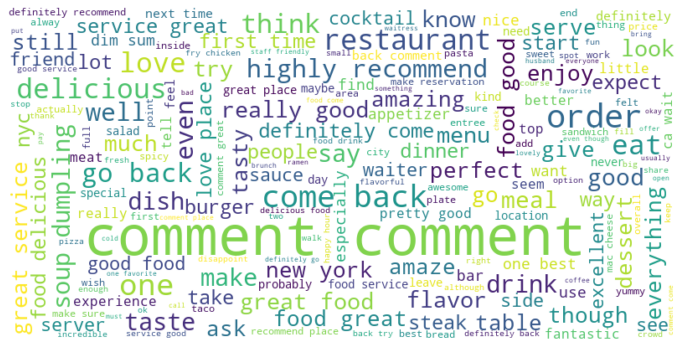

In [34]:
# Creating a word cloud of the tweets

# concatenate all the tweets into a single string
all_reviews = ' '.join(user_restaurant_df['processed_comments'].values)

# create a WordCloud object
wc = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(all_reviews)

# display the word cloud
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

The common words have positive connotations like Good, amazing, delicious, great.

**Sentiment Analysis of Reveiws**

In [35]:
#calculating subjectivity and polarity scores using TextBlob

user_restaurant_df['Subjectivity'] = user_restaurant_df['processed_comments'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
user_restaurant_df['Polarity'] = user_restaurant_df['processed_comments'].apply(lambda x: TextBlob(x).sentiment.polarity)
user_restaurant_df['Review_sentiment'] = user_restaurant_df['Polarity'].apply(lambda x: 'positive' if x > 0 else (
                                'negative' if x < 0 else 'neutral'))

user_restaurant_df.head(3)

,user_ID,location,review_date,user_rating,comments,url,avg_restaurant_rating,pricing,Latitude,Longitude,...,cuisine,id,number_of_reviews,processed_comments,processed_cuisine,processed_transactions,bogs,Subjectivity,Polarity,Review_sentiment
0,/user_details?userid=pRfWy61wU9e1nrCVrOEWLA,"new york, ny",2/16/2023,4.0,no comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,$$,40.733618,-73.988511,...,food court,JjomQ2VCojutXJQeGVt-QA,13.0,comment,food court,,food court comment,0.0,0.0,neutral
1,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,"brooklyn, ny",1/6/2023,4.0,no comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,$$,40.733618,-73.988511,...,food court,JjomQ2VCojutXJQeGVt-QA,13.0,comment,food court,,food court comment,0.0,0.0,neutral
2,/user_details?userid=VLTBPUrbNRR-f84h-altQw,"brooklyn, ny",12/15/2022,3.0,no comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,$$,40.733618,-73.988511,...,food court,JjomQ2VCojutXJQeGVt-QA,13.0,comment,food court,,food court comment,0.0,0.0,neutral


Review_sentiment
positive    71314
neutral     62263
negative     5535
Name: count, dtype: int64


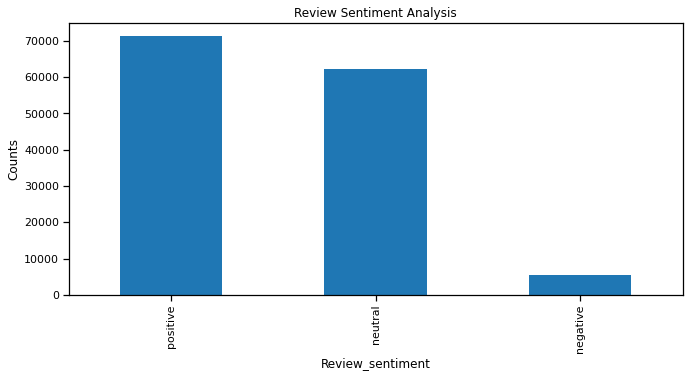

In [36]:
# Show the value counts
print(user_restaurant_df['Review_sentiment'].value_counts())

# bar plot showing the sentiment categories
plt.subplots(figsize= (11, 5))
plt.title('Review Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.xticks(rotation=45)
user_restaurant_df['Review_sentiment'].value_counts().plot(kind='bar')
plt.show()

**Most popular cuisines**

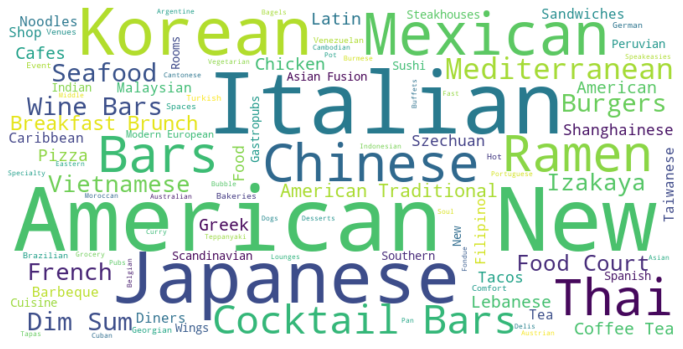

In [37]:
cuisine_processed = restaurant_df['Cuisine'].apply(process_sentences)

# Convert the series into string text
text = ' '.join(cuisine_processed.values)

# create a WordCloud object
wc = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)
# display the word cloud
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

**Top 10 Most reviewed restaurants**

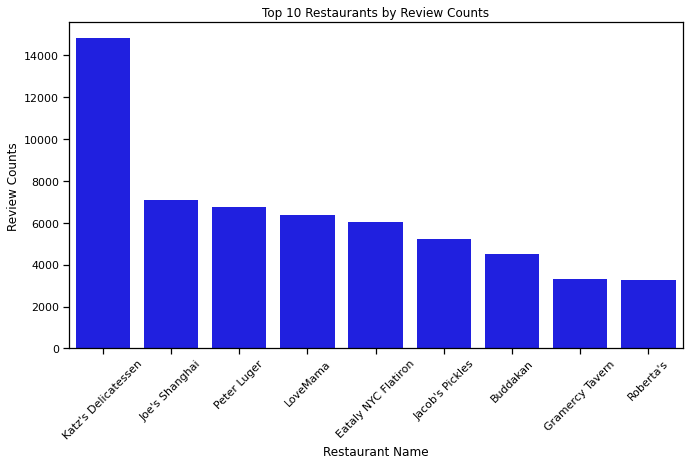

In [38]:
restaurants_review_df = restaurant_df[['Name','Number of Reviews']]
#get the top10 restaurants
top10 = restaurants_review_df.nlargest(10, 'Number of Reviews')
# create a barplot of the top 10 restaurants
plt.figure(figsize=(11,6))
sns.barplot(data=top10, x='Name', y='Number of Reviews', color='blue')
plt.title("Top 10 Restaurants by Review Counts")
plt.xlabel("Restaurant Name")
plt.ylabel("Review Counts")
plt.xticks(rotation=45)
plt.show()

**Ratings Distribution**

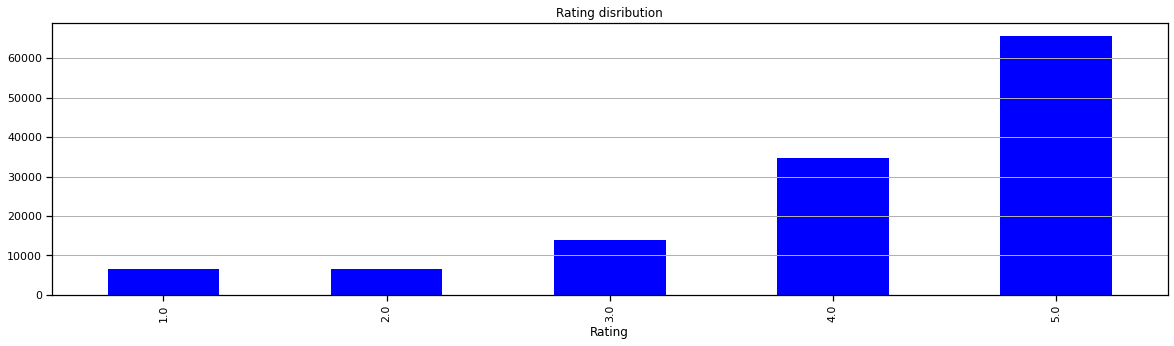

In [39]:
# remove grid
user_revs_df['Rating'].value_counts().sort_index().plot(kind="bar", color="blue", title="Rating disribution", 
                                                figsize=(20,5)).grid(axis='y')
plt.show()

<hr>

# 3. Data Preparation

### i. Data Reduction

<ul>
    <li> Remove attributes that we don't need for content </li>
    <li> Rename attributes for better convention </li>
</ul>
    

In [40]:
# viewing the restaurant data set before cleaning occurs
display('Starting point of dataset restaurants', restaurant_df)

'Starting point of dataset restaurants'

,Name,Rating,Pricing,URL,Latitude,Longitude,Transactions,Location,Phone,Display Phone,Distance,Reviews,Review Count,Cuisine,Restaurant ID,Number of Reviews
0,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.995970,"['delivery', 'pickup', 'restaurant_reservation']","35 W 13th St, New York, NY 10011",1.212367e+10,(212) 367-1979,3526.365252,[{'text': 'This small and crowded place seems ...,3,Italian,hdiuRS9sVZSMReZm4oV5SA,1851
1,LoveMama,5,$$,https://www.yelp.com/biz/lovemama-new-york?adj...,40.730409,-73.986127,"['delivery', 'pickup', 'restaurant_reservation']","174 2nd Ave, New York, NY 10003",1.212255e+10,(212) 254-5370,2645.074283,[{'text': 'Absolutely LOVED LoveMama!! As a co...,3,Thai,jjJc_CrkB2HodEinB6cWww,6377
2,Ye's Apothecary,5,$$$,https://www.yelp.com/biz/yes-apothecary-new-yo...,40.719450,-73.989800,[],"119 Orchard St, New York, NY 10002",NaN,NaN,1638.756115,[{'text': 'Edy and Josh are the BEST bartender...,3,Szechuan,8YWLuLUKj0t_0_Xv06UUtw,212
3,Joe's Shanghai,4,$$,https://www.yelp.com/biz/joes-shanghai-new-yor...,40.715661,-73.996701,"['delivery', 'pickup']","46 Bowery St, New York, NY 10013",1.212234e+10,(212) 233-8888,1766.176007,[{'text': 'This is the third stop of our food ...,3,Shanghainese,0CjK3esfpFcxIopebzjFxA,7098
4,Antidote,4,$$,https://www.yelp.com/biz/antidote-brooklyn-2?a...,40.714253,-73.965448,"['delivery', 'pickup']","66 S 2nd St, Brooklyn, NY 11249",1.718782e+10,(718) 782-2585,1376.494330,[{'text': 'Excellent service & food! The drink...,3,Cocktail Bars,4DInnPhOyvXFbYpUdO0SMQ,325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ABC Kitchen,5,$$$,https://www.yelp.com/biz/abc-kitchen-new-york?...,40.737750,-73.989634,['delivery'],"35 E 18th St, New York, NY 10003",1.212476e+10,(212) 475-5829,3508.876621,[{'text': 'Came in shortly after 12:30pm for a...,3,Breakfast & Brunch,dMhRafXdr765DHe0k-QfaQ,3165
496,Liberty Bagels,5,$,https://www.yelp.com/biz/liberty-bagels-new-yo...,40.763080,-73.972750,[],"16 E 58th St, New York, NY 10022",NaN,NaN,6229.014047,[{'text': 'Oh hells yes. The garlic bagel her...,3,Bagels,r1QcTb4XA1t1gmni8qMBLw,131
497,Luchadores,5,$$,https://www.yelp.com/biz/luchadores-new-york?a...,40.705820,-74.004110,"['delivery', 'pickup']","87 South St, New York, NY 10038",1.917409e+10,(917) 409-3033,2132.580935,"[{'text': ""It's gotten super popular over the ...",3,Mexican,8_NilECM6qg_L7WYb25uNw,130
498,Pier 66 Maritime,4,$$,https://www.yelp.com/biz/pier-66-maritime-new-...,40.752197,-74.009167,[],"W 26th St, Hudson River Park, New York, NY 10010",1.212990e+10,(212) 989-6363,5609.568583,"[{'text': ""My friend had her birthday dinner h...",3,American (Traditional),80jmHsdVmeYxaoAHaegKyQ,63


Checking and dropping of any duplicates in the restaurant data

In [41]:
restaurant_df.duplicated().sum()

59

In [42]:
restaurant_df.drop_duplicates(inplace=True)

Selecting the restaurant that have reviews on the user reviews df side

In [43]:
# Pick out the number of restaurants already scraped in the users_revs side

filtered_restaurant_df = restaurant_df[restaurant_df['URL'].isin(user_revs_df['URL'].unique())]
len(set(filtered_restaurant_df['Restaurant ID']))

299

Giving the restaurants a numerical id instead of using the initial id and urls as placeholders

In [44]:
# giving the restaurants a numerical id
filtered_restaurant_df['Rest_num_id'] = pd.factorize(filtered_restaurant_df['URL'])[0]

Adding the top comments of reviewers into a column that is related to the restaurants they reviewed

In [45]:
filtered_restaurant_df['Comments'] = ''

# loop through each row in the original dataframe
for index, row in filtered_restaurant_df.iterrows():
    # reviews = row['Reviews']
    
    url = row['URL']
    reviews = []
    holder = user_revs_df.loc[user_revs_df['URL'] == url].iterrows()
    for row in holder:
        comment = row[1]['Comment']
        if row[1]['Comment'] != 'No comment':
            reviews.append([comment])
    if reviews == []:
        reviews.append('')
    # print(reviews[0])
    # print(f'The count {index}')
    
    filtered_restaurant_df['Comments'][filtered_restaurant_df['URL'] == url] = reviews[0]

* The addition of the comments column that replaces the reviews column due to the fact the information within that column was difficult to extract continuously moving forward, hence, the main reason we chose to collect the necessary comments from there in its own column

In [46]:
# removing unnecessary columns
filtered_restaurant_df.drop(columns=['Latitude', 'Longitude', 'Phone', 'Display Phone', 'Reviews',
                                    'Review Count', 'Distance'], inplace=True)


# renaming columns as a better convention
filtered_restaurant_df.rename(columns={'Name': 'name', 'Rating': 'rating', 'Rest_num_id': 'num_id',
                                       'Cuisine': 'cuisine', 'Pricing': 'price', 'Location': 'location', 
                                      'Restaurant ID': 'id', 'Number of Reviews': 'review counts', 
                                       'Transactions': 'transactions', 'Comments': 'comments'}, inplace=True)

display('After reduction and renaming', filtered_restaurant_df.head())

'After reduction and renaming'

,name,rating,price,URL,transactions,location,cuisine,id,review counts,num_id,comments
0,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,"['delivery', 'pickup', 'restaurant_reservation']","35 W 13th St, New York, NY 10011",Italian,hdiuRS9sVZSMReZm4oV5SA,1851,0,This small and crowded place seems to be a nei...
1,LoveMama,5,$$,https://www.yelp.com/biz/lovemama-new-york?adj...,"['delivery', 'pickup', 'restaurant_reservation']","174 2nd Ave, New York, NY 10003",Thai,jjJc_CrkB2HodEinB6cWww,6377,1,Absolutely LOVED LoveMama!! As a college stude...
2,Ye's Apothecary,5,$$$,https://www.yelp.com/biz/yes-apothecary-new-yo...,[],"119 Orchard St, New York, NY 10002",Szechuan,8YWLuLUKj0t_0_Xv06UUtw,212,2,"Good food, good service and good vibe. Drinks ..."
3,Joe's Shanghai,4,$$,https://www.yelp.com/biz/joes-shanghai-new-yor...,"['delivery', 'pickup']","46 Bowery St, New York, NY 10013",Shanghainese,0CjK3esfpFcxIopebzjFxA,7098,3,"Casual, soup dumpling shop in Chinatown. No re..."
4,Antidote,4,$$,https://www.yelp.com/biz/antidote-brooklyn-2?a...,"['delivery', 'pickup']","66 S 2nd St, Brooklyn, NY 11249",Cocktail Bars,4DInnPhOyvXFbYpUdO0SMQ,325,4,Excellent service & food! The drinks were so b...


<hr>
Working on the users df for preprocessing as well
<p>Checking for duplicates and removing them if any</p>

In [47]:
user_revs_df.duplicated().sum()

0

In [48]:
user_revs_df.drop_duplicates(inplace=True)

Adding the new restaurant ids to the users df to allow uniformity and dropping of irrelevant columns

In [49]:
# 
url_ids = filtered_restaurant_df[['URL','num_id']][filtered_restaurant_df['URL'].isin(user_revs_df['URL'].unique())]
url_ids
user_revs_df = pd.merge(user_revs_df, url_ids, on="URL", how='left')
user_revs_df.head()

,User_Name,Account,Location,Date_of_review,Rating,Comment,URL,num_id
0,Richard D.,/user_details?userid=pRfWy61wU9e1nrCVrOEWLA,"New York, NY",2/16/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,182.0
1,Elisa H.,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,"Brooklyn, NY",1/6/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,182.0
2,Morlene C.,/user_details?userid=VLTBPUrbNRR-f84h-altQw,"Brooklyn, NY",12/15/2022,3.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,182.0
3,Ruwan J.,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,"New York, NY",3/23/2023,4.0,Urbanspace Union Square is a newish addition-...,https://www.yelp.com/biz/urbanspace-union-squa...,182.0
4,Mike C.,/user_details?userid=37cpUoM8hlkSQfReIEBd-Q,"Forest Hills, NY",12/14/2022,5.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,182.0


Removing irrelevant columns and renaming the remainder to a standard convention

In [50]:
filtered_users_df = user_revs_df.copy()

# removing unnecessary columns
filtered_users_df.drop(columns=['User_Name', 'Location', 'Date_of_review', 'Comment', 'URL'], inplace=True)

# renaming the remaining columns appropriately
filtered_users_df.rename(columns={'num_id': 'restaurant-id', 'Rating': 'rating', 'Account': 'account'}, inplace=True)

display('After reduction on user df', filtered_users_df)


'After reduction on user df'

,account,rating,restaurant-id
0,/user_details?userid=pRfWy61wU9e1nrCVrOEWLA,4.0,182.0
1,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,4.0,182.0
2,/user_details?userid=VLTBPUrbNRR-f84h-altQw,3.0,182.0
3,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,4.0,182.0
4,/user_details?userid=37cpUoM8hlkSQfReIEBd-Q,5.0,182.0
...,...,...,...
127703,/user_details?userid=K5cFV4t78HlO1fTdK5Z6xA,5.0,NaN
127704,/user_details?userid=ZighfCv43MPj6MgyidpwQg,3.0,NaN
127705,/user_details?userid=B_ri-KD0o0JP5p06PGfGKg,5.0,NaN
127706,/user_details?userid=MWlWUQBHv7jbxhnay6UCQQ,5.0,NaN


<hr>

### ii. Missing Values

Checking for missing values in both dataframes and dealing with them accordingly

In [51]:
# missing values on the restaurant df
display('Missing Values', filtered_restaurant_df.stb.missing())

'Missing Values'

,missing,total,percent
price,117,303,38.613861
name,0,303,0.000000
rating,0,303,0.000000
URL,0,303,0.000000
transactions,0,303,0.000000
location,0,303,0.000000
cuisine,0,303,0.000000
id,0,303,0.000000
review counts,0,303,0.000000
num_id,0,303,0.000000


* The price column is missing 38%

In [52]:
# missing values on the user df
display('Missing Values', filtered_users_df.stb.missing())

'Missing Values'

,missing,total,percent
restaurant-id,14019,127708,10.977386
account,0,127708,0.000000
rating,0,127708,0.000000


* Restaurant-id is missing 11% of restaurant information

Making replacements can be a good way to retain the data. We chose to use the mode due to the price range being categorical

In [53]:
# using rating data to replace
# Since it is categorical data, we can use mode
filtered_restaurant_df['price'] = filtered_restaurant_df['price'].fillna(filtered_restaurant_df['price'].mode()[0])
display('Missing Values', filtered_restaurant_df.stb.missing())

'Missing Values'

,missing,total,percent
name,0,303,0.0
rating,0,303,0.0
price,0,303,0.0
URL,0,303,0.0
transactions,0,303,0.0
location,0,303,0.0
cuisine,0,303,0.0
id,0,303,0.0
review counts,0,303,0.0
num_id,0,303,0.0


Rows with missing restaurants were dropped because they were not going to be traced on the restaurant df

In [54]:
# dropping the null value restaurants
filtered_users_df.dropna(axis=0, inplace=True)
display('After dropping missing Values', filtered_users_df.stb.missing())

'After dropping missing Values'

,missing,total,percent
account,0,113689,0.0
rating,0,113689,0.0
restaurant-id,0,113689,0.0


<p><strong>NB:</strong> Adding of a numerical user-id to the users df and removing the account urls</p>

In [55]:
filtered_users_df['user-id'] = pd.factorize(filtered_users_df['account'])[0]
filtered_users_df.head()

,account,rating,restaurant-id,user-id
0,/user_details?userid=pRfWy61wU9e1nrCVrOEWLA,4.0,182.0,0
1,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,4.0,182.0,1
2,/user_details?userid=VLTBPUrbNRR-f84h-altQw,3.0,182.0,2
3,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,4.0,182.0,3
4,/user_details?userid=37cpUoM8hlkSQfReIEBd-Q,5.0,182.0,4


In [56]:
# dropping the account urls column
filtered_users_df.drop(columns=['account'], inplace=True)

<hr>

### iii. Data transformation

<p>Switching all the columns to <strong>lower</strong> case</p>

In [57]:
# Converting the columns to lower case
# no need for this step on the user df
filtered_restaurant_df['name'] = filtered_restaurant_df['name'].str.lower()
filtered_restaurant_df['location'] = filtered_restaurant_df['location'].str.lower()
filtered_restaurant_df['cuisine'] = filtered_restaurant_df['cuisine'].str.lower()
filtered_restaurant_df['comments'] = filtered_restaurant_df['comments'].str.lower()

filtered_restaurant_df.sample(5)

,name,rating,price,URL,transactions,location,cuisine,id,review counts,num_id,comments
236,city vineyard,5,$$$,https://www.yelp.com/biz/city-vineyard-new-yor...,"['delivery', 'pickup']","233 west st, new york, ny 10013",wine bars,ooYUO3Pq_qypc1NXFzeLYQ,1137,164,most affordable option for outdoor bubble dini...
7,benemon,5,$$,https://www.yelp.com/biz/benemon-new-york?adju...,"['delivery', 'pickup']","108 e 4th st, new york, ny 10003",japanese,axqp3pGJXnTLgq2QrPyDyQ,699,7,"they say they specialize in eel, and they are ..."
245,osamil,5,$$,https://www.yelp.com/biz/osamil-new-york?adjus...,['delivery'],"5 west 31st st, new york, ny 10001",korean,X8yEmEDD9ZTkHoIRFqzcRw,626,171,we love this place. the whole menu is amazing ...
487,oxalis,5,$$$$,https://www.yelp.com/biz/oxalis-brooklyn?adjus...,"['delivery', 'pickup']","791 washington ave, brooklyn, ny 11238",french,TQzGf4k3HXyMbnNkYKKQSw,230,288,small spot robust flavors! my second time here...
154,cremini's - aperitivo & kitchen,5,$$,https://www.yelp.com/biz/creminis-aperitivo-an...,"['delivery', 'pickup']","521 court st, brooklyn, ny 11231",italian,KogxM0x2p9auUyU4h4CAqQ,58,106,"i give the food 4.5-5 stars, and the atmospher..."


<p>Handling the <strong>transactions</strong> column so as to get a standard formatting style</p>

In [58]:
from ast import literal_eval

# converts the strings to python list
filtered_restaurant_df['transactions'] = filtered_restaurant_df['transactions'].apply(lambda x: literal_eval(x))

# joins the created python lists together
filtered_restaurant_df['transactions'] = filtered_restaurant_df['transactions'].apply(lambda x: ', '.join(x))

In [59]:
display('filtered transactions', filtered_restaurant_df['transactions'].head())

'filtered transactions'

0    delivery, pickup, restaurant_reservation
1    delivery, pickup, restaurant_reservation
2                                            
3                            delivery, pickup
4                            delivery, pickup
Name: transactions, dtype: object

In [60]:
# Dataset so far
display('All changes done so far', filtered_restaurant_df.head())

'All changes done so far'

,name,rating,price,URL,transactions,location,cuisine,id,review counts,num_id,comments
0,da andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,"delivery, pickup, restaurant_reservation","35 w 13th st, new york, ny 10011",italian,hdiuRS9sVZSMReZm4oV5SA,1851,0,this small and crowded place seems to be a nei...
1,lovemama,5,$$,https://www.yelp.com/biz/lovemama-new-york?adj...,"delivery, pickup, restaurant_reservation","174 2nd ave, new york, ny 10003",thai,jjJc_CrkB2HodEinB6cWww,6377,1,absolutely loved lovemama!! as a college stude...
2,ye's apothecary,5,$$$,https://www.yelp.com/biz/yes-apothecary-new-yo...,,"119 orchard st, new york, ny 10002",szechuan,8YWLuLUKj0t_0_Xv06UUtw,212,2,"good food, good service and good vibe. drinks ..."
3,joe's shanghai,4,$$,https://www.yelp.com/biz/joes-shanghai-new-yor...,"delivery, pickup","46 bowery st, new york, ny 10013",shanghainese,0CjK3esfpFcxIopebzjFxA,7098,3,"casual, soup dumpling shop in chinatown. no re..."
4,antidote,4,$$,https://www.yelp.com/biz/antidote-brooklyn-2?a...,"delivery, pickup","66 s 2nd st, brooklyn, ny 11249",cocktail bars,4DInnPhOyvXFbYpUdO0SMQ,325,4,excellent service & food! the drinks were so b...


<p>Time to deal with the price column and convert the signs to meaningful values.
<br>Listing all the possible values of price in the dataset first</p>

<br>

<strong>NB:</strong>  All the values on the user df are at the correct format as for now 


In [61]:
filtered_restaurant_df['price'].unique()

array(['$$', '$$$', '$$$$', '$'], dtype=object)

<p>There are 4 ranges so far:</p>

<ul>
<li> Mid-range (3 signs) </li>
<li> Cheap Eats (1 sign) </li>
<li> Affordable (2 signs) </li>
<li> Pricey Dining (4 signs) </li>
</ul>

In [62]:
# replacing the signs
filtered_restaurant_df['price'].replace(['$$', '$$$$', '$', '$$$'], ['low', 'pricey-dining', 'popular-eats', 'mid-range'], inplace=True)

Dealing with the lengthy location information and picking the useful categorical sections

In [63]:
constituents_list = list(set(filtered_restaurant_df['location'].str.split(',').str[-2].str.strip(string.punctuation)))

In [64]:
# viewing the locations restaurants are commonly located
constituents_list

[' sunnyside',
 ' ridgewood',
 ' new york',
 ' jersey city',
 'new york',
 ' long island city',
 ' woodside',
 ' manhattan',
 ' brooklyn']

In [65]:
# Need to work on locations
filtered_restaurant_df['location'] = filtered_restaurant_df['location'].str.split(',').str[-2].str.strip(string.punctuation)

# adjusting the new york ward to be represented better
filtered_restaurant_df.loc[filtered_restaurant_df.location == 'new york', 'location'] = ' new york'


display('All changes done before preprocessing on text data', filtered_restaurant_df.head())

'All changes done before preprocessing on text data'

,name,rating,price,URL,transactions,location,cuisine,id,review counts,num_id,comments
0,da andrea,4,low,https://www.yelp.com/biz/da-andrea-new-york?ad...,"delivery, pickup, restaurant_reservation",new york,italian,hdiuRS9sVZSMReZm4oV5SA,1851,0,this small and crowded place seems to be a nei...
1,lovemama,5,low,https://www.yelp.com/biz/lovemama-new-york?adj...,"delivery, pickup, restaurant_reservation",new york,thai,jjJc_CrkB2HodEinB6cWww,6377,1,absolutely loved lovemama!! as a college stude...
2,ye's apothecary,5,mid-range,https://www.yelp.com/biz/yes-apothecary-new-yo...,,new york,szechuan,8YWLuLUKj0t_0_Xv06UUtw,212,2,"good food, good service and good vibe. drinks ..."
3,joe's shanghai,4,low,https://www.yelp.com/biz/joes-shanghai-new-yor...,"delivery, pickup",new york,shanghainese,0CjK3esfpFcxIopebzjFxA,7098,3,"casual, soup dumpling shop in chinatown. no re..."
4,antidote,4,low,https://www.yelp.com/biz/antidote-brooklyn-2?a...,"delivery, pickup",brooklyn,cocktail bars,4DInnPhOyvXFbYpUdO0SMQ,325,4,excellent service & food! the drinks were so b...


In [66]:
# updating the constituents list
constituents_list = list(filtered_restaurant_df['location'].unique())
constituents_list

[' new york',
 ' brooklyn',
 ' sunnyside',
 ' ridgewood',
 ' woodside',
 ' jersey city',
 ' long island city',
 ' manhattan']

<hr>

### iv. Preprocess text data

<p> We chose to use NLTK word Lemmatizer and also remove English stop words and non alphabet tokens from reviews and style attributes. </p>

<p>Let's handle the function for that:</p>

In [67]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def process_sentences(text):
    temp_sent =[]

    # Tokenize words
    words = nltk.word_tokenize(text)

    # Lemmatize each of the words based on their position in the sentence
    tags = nltk.pos_tag(words)
    for i, word in enumerate(words):
        # only verbs
        if tags[i][1] in ('VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'):
            lemmatized = lemmatizer.lemmatize(word, 'v')
        else:
            lemmatized = lemmatizer.lemmatize(word)
        
        # Remove stop words and non alphabet tokens
        if lemmatized not in stop_words and lemmatized.isalpha(): 
            temp_sent.append(lemmatized)

    # Some other clean-up
    full_sentence = ' '.join(temp_sent)
    full_sentence = full_sentence.replace("n't", " not")
    full_sentence = full_sentence.replace("'m", " am")
    full_sentence = full_sentence.replace("'s", " is")
    full_sentence = full_sentence.replace("'re", " are")
    full_sentence = full_sentence.replace("'ll", " will")
    full_sentence = full_sentence.replace("'ve", " have")
    full_sentence = full_sentence.replace("'d", " would")
    return full_sentence

In [68]:
# creation of filtered comments
filtered_restaurant_df['processed_comments'] = filtered_restaurant_df['comments'].apply(process_sentences)

In [69]:
# creation of filtered cuisines
filtered_restaurant_df['processed_cuisine'] = filtered_restaurant_df['cuisine'].apply(process_sentences)

In [70]:
# creation of filtered transactions
filtered_restaurant_df['processed_transactions'] = filtered_restaurant_df['transactions'].apply(process_sentences)

* Time to compare the processed columns (i.e. cuisine & comments)

In [71]:
filtered_restaurant_df[['processed_comments', 'comments', 'processed_cuisine', 'cuisine', 'processed_transactions', 'transactions']].sample(5)

,processed_comments,comments,processed_cuisine,cuisine,processed_transactions,transactions
490,beautiful even spent restaurant prefer dress c...,beautiful evening spent in this restaurant. i ...,steakhouse,steakhouses,,
2,good food good service good vibe drink chinese...,"good food, good service and good vibe. drinks ...",szechuan,szechuan,,
341,best food service yesterday chicken marsala amaze,best food and service yesterday i had chicken ...,italian,italian,pickup delivery,"pickup, delivery, restaurant_reservation"
403,generous portion price piece fish roll good si...,they are generous with their portions for thei...,sushi bar,sushi bars,delivery,delivery
287,place freaking cute absolutely love space well...,this place is so freaking cute i absolutely lo...,italian,italian,delivery pickup,"delivery, pickup"


<p>Eventually, let's create a bag_of_words with a combination of our new preprocessed attributes:</p>
<br>

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; <strong>bag of words=style processed+reviews processed</strong>

In [72]:
filtered_restaurant_df['bogs'] = filtered_restaurant_df['processed_cuisine'] + ' ' + filtered_restaurant_df['processed_comments'] + ' ' + filtered_restaurant_df['processed_transactions']
display('A sample of bag of words', filtered_restaurant_df[['processed_comments', 'processed_cuisine', 'processed_transactions','bogs']].sample(5))

'A sample of bag of words'

,processed_comments,processed_cuisine,processed_transactions,bogs
213,leroy favorite neighborhood spot great place g...,cocktail bar,,cocktail bar leroy favorite neighborhood spot ...
178,great customer service food come friend love i...,teppanyaki,delivery pickup,teppanyaki great customer service food come fr...
4,excellent service food drink beautiful unique ...,cocktail bar,delivery pickup,cocktail bar excellent service food drink beau...
27,wow one best meal city family platter enough f...,lebanese,delivery pickup,lebanese wow one best meal city family platter...
8,amazing dinner happy many gluten free option f...,american new,pickup delivery,american new amazing dinner happy many gluten ...


* The last transformation we needed to do was on the reclassified prices.
* We did a map of words to show synonymns of the price class in a way

In [73]:
price_map = {
    'low':('everybody', 'no-expense', 'accomodating', 'inexpensive', 'cheap', 'ample', 'rock-bottom'), 
    'popular-eats': ('low-price', 'low-cost', 'economical', 'economic', 'modest'),
    'mid-range': ('moderate', 'fair', 'mid-price', 'reasonable', 'average'),
    'pricey-dining': ('expensive', 'fancy', 'lavish', 'fine', 'extravagant')
}

<hr>
<br>

# 4. Modeling

<h4> Our goal is to model: </h4>
<ul>
    <li>Content based recommender</li>
    <li>Collaborative based recommender</li>
    <li>1Combine the above recommenders for a hybrid setup</li>
</ul>

**a. Content Based Recommendation**

This model filters out a user's input statement (e.g. I want waffles in brooklyn) and it gives you a list of restaurants that most match your desire

In [74]:
def contentB_recommend(description):
    # Convert user input to lowercase
    description = str(description)
    description = description.lower()

    data = filtered_restaurant_df.copy()

    # Extract cities
    constituents_input = []
    for const in constituents_list:
        if const in description:
            constituents_input.append(const)
            description = description.replace(str(const), "")

    if constituents_input:
        data = data[data['location'].isin(constituents_input)]

    # Extract price class
    for key, value in price_map.items():
        if any(v in description for v in value):
            data = data[data['price'] == key]
            break
    
    # Process user description text input 
    description = process_sentences(description)
    description = description.strip()
    print('Processed user feedback:', description)

    # Init a TF-IDF vectorizer
    tfidfvec = TfidfVectorizer()

    # Fit data on processed reviews
    vec = tfidfvec.fit(data["bogs"])
    features = vec.transform(data["bogs"])

    # Transform user input data based on fitted model
    description_vector =  vec.transform([description])

    # Calculate cosine similarities between users processed input and reviews
    cos_sim = linear_kernel(description_vector, features)

    # Add similarities to data frame
    data['similarity'] = cos_sim[0]

    # Sort data frame by similarities
    data.sort_values(by='similarity', ascending=False, inplace=True)
    
    results = data[['name', 'rating', 'location', 'price', 'cuisine', 'transactions', 'comments', 'similarity', 'id', 'num_id']]

    return results.head(10)

In [75]:
# specified cuisine
contentB_recommend('for chinese food')

Processed user feedback: chinese food


,name,rating,location,price,cuisine,transactions,comments,similarity,id,num_id
2,ye's apothecary,5,new york,mid-range,szechuan,,"good food, good service and good vibe. drinks ...",0.343529,8YWLuLUKj0t_0_Xv06UUtw,2
282,bites of xi'an,4,brooklyn,popular-eats,chinese,delivery,wonderful pork and cabbage dumplings. great be...,0.269314,rPTX2J5KGDkN1QhPD-QOvg,188
172,silky kitchen,4,new york,low,chinese,"delivery, pickup",a self-service chinese restaurant with a decen...,0.254617,olRNNJCJ2TJvPRmjBiOcGA,117
31,tasty hand-pulled noodles,4,new york,low,chinese,"delivery, pickup",ok noodles. no different than noodles that you...,0.225024,97q5nUQTuBo_h00XCxna2A,19
334,chinah,4,brooklyn,low,chinese,"pickup, delivery",the people working there are professional and ...,0.217967,j61hBldPvd47MdLgeySlxQ,219
96,fong on,4,new york,popular-eats,chinese,delivery,savory tofu - flavor mixture was tasty; textur...,0.178400,iKW9zBGWfE9CM6MfK0UtjA,67
93,sun hing lung co,5,new york,popular-eats,chinese,,was walking around waiting for a table at a re...,0.177263,9-vKFnUby_6-pR6UJxjzMw,64
139,dunhuang miss noodles,1,brooklyn,low,chinese,"delivery, pickup",the food has consistently been really good. i ...,0.175916,cOtB9fWWLrbaBebZDjJquQ,95
125,shanghai 21,5,new york,low,shanghainese,"delivery, pickup",we ate here after the chinese new year parade ...,0.150820,R26zweQ8-xoZS7iHkXQOvw,84
177,bonnie's,3,brooklyn,mid-range,cantonese,,food was good but i didn't think it was worth ...,0.146283,k0fnJRSV8tzM2bzkvFdlGg,122


In [76]:
# with price class and location
contentB_recommend('a reasonable breakfast')

Processed user feedback: reasonable breakfast


,name,rating,location,price,cuisine,transactions,comments,similarity,id,num_id
495,abc kitchen,5,new york,mid-range,breakfast & brunch,delivery,"absolutely phenomenal!!! i got the special, wh...",0.116155,dMhRafXdr765DHe0k-QfaQ,295
275,electric lemon,3,new york,mid-range,american (new),,i absolutely loved the electric lemon! the fir...,0.090488,OBRYVNn2FRhVCCadoFepBQ,183
56,nowon,5,new york,mid-range,korean,"pickup, delivery",the outdoor seating area has an extremely retr...,0.000000,LMyvruexOQzzHQrAgbdqiA,37
73,oxomoco,5,brooklyn,mid-range,mexican,delivery,went to oxomoco after craving for some latino ...,0.000000,vyKBwzRdNX4yiJDIFv37iw,52
494,bowery road,3,new york,mid-range,american (new),"delivery, pickup",we came at a down time around midday for the r...,0.000000,FJepPR5CYRggxRwAjlqg6A,294
493,naked tomato,5,new york,mid-range,mediterranean,,the worst! waited a decade for host to come an...,0.000000,vA0ssUIUXrZLr_hsYpkH6A,293
490,steak frites bistro,4,new york,mid-range,steakhouses,,beautiful evening spent in this restaurant. i ...,0.000000,V3dHB6xAdd8_dH7t481PAw,291
440,bar crudo,4,brooklyn,mid-range,seafood,"delivery, pickup","amazing service. we went for happy hour, the d...",0.000000,MYh3iKpuo1HQUoHUyzA0BQ,276
428,black walnut,3,brooklyn,mid-range,venues & event spaces,"delivery, pickup",we were looking for a place for dinner after s...,0.000000,d0Up0vNOqr1eL3EtjHboMA,269
423,xixa,4,brooklyn,mid-range,mexican,"delivery, pickup",this is my second time here. the first time wa...,0.000000,Ck09FempamAKGSPsV_bX-A,265


In [77]:
# with transaction and price class and location
contentB_recommend('burgers in Newyork')

Processed user feedback: burger newyork


,name,rating,location,price,cuisine,transactions,comments,similarity,id,num_id
370,7th street burger,4,new york,low,burgers,"pickup, delivery",my brother claimed this the best burger of nyc...,0.644683,VVYea3NzbklOyHEzSEavWw,234
389,the hihi room,4,new york,low,burgers,"pickup, delivery",i dislike veggie burgers. but they have an ama...,0.596696,QyB52nUrwJRY0ipuwcfR_A,246
411,kings of kobe,4,new york,low,burgers,"delivery, pickup",the kings of kobe was a great burger place and...,0.496299,H26qMBb0OFNn2xmSTM1Phw,259
301,miznon,4,new york,low,mediterranean,"pickup, delivery",my favorite burger place!! very close to 7th s...,0.351680,kTQ0rRfgtlPwX9_O8OY_UA,202
176,emily - west village,5,new york,low,pizza,"delivery, pickup",service and staff is a little disorganized but...,0.281758,m86CNmYThtzzWB3nPnrhbg,121
239,macao trading company,5,new york,mid-range,asian fusion,"delivery, pickup",just come for the drinks and bar. cocktails so...,0.278874,U74_3F7r3tMhd6dmTmDBxQ,166
240,monkey bar,2,new york,low,american (traditional),,this is probably the best burger i've ever had...,0.268063,gZz9A8k8ORC_xl0aHxtY4w,167
64,ingas bar,3,brooklyn,low,american (new),,cool relaxed vibe. this would be a good date s...,0.257219,48nRODGl30EWpYMcCTOeAw,44
114,sweetwater restaurant,4,brooklyn,low,american (new),,"yum! while i am def a meat eater, i love when ...",0.235187,8wMJdpw2R_4VfS55itB_gQ,75
449,leyla,4,new york,low,turkish,"delivery, pickup",amazing atmosphere cute place with lots of dec...,0.195939,goKn7tKTIqpNPM_jR2yRCg,283


In [78]:
# with transaction and price class and location
contentB_recommend('I want a mid-range american(new) chicken restaurant with delivery')

Processed user feedback: want american new chicken restaurant delivery


,name,rating,location,price,cuisine,transactions,comments,similarity,id,num_id
262,chino grande,5,brooklyn,low,american (new),,had to try this new spot after hearing so many...,0.271434,XQiIGgSjx3wIxvvzOZP9Cw,173
376,fine & rare,4,new york,mid-range,american (new),"pickup, delivery",excellent night great service atmosphere was e...,0.213704,Xk3BVvlX-KXh6kJhbClMKw,239
393,five leaves,1,brooklyn,low,american (new),delivery,excellent restaurant. the most delicious food....,0.211514,1Q3oaJahyGRogDWgpo7PIw,249
494,bowery road,3,new york,mid-range,american (new),"delivery, pickup",we came at a down time around midday for the r...,0.199407,FJepPR5CYRggxRwAjlqg6A,294
400,go! go! curry!,4,new york,low,japanese curry,"delivery, pickup","best japanese curry in my opinion, they are co...",0.192585,alFl7eiu6Go-YxZAdp88Fw,254
182,cool world,5,brooklyn,low,american (new),,everything was next level. so well done and be...,0.180525,1lPcNVCHCNE6KbQJzbguzQ,126
69,white oak tavern,4,new york,low,american (new),"pickup, delivery",i have been to the tavern a few times and love...,0.167483,mVN2G1c5bRtAsNlr2Tbx6Q,48
299,gage and tollner,5,brooklyn,pricey-dining,american (traditional),delivery,food was great. definitely get the chicken liv...,0.160015,G5YZ7UcqCEYtezOxEETZjQ,200
64,ingas bar,3,brooklyn,low,american (new),,cool relaxed vibe. this would be a good date s...,0.159013,48nRODGl30EWpYMcCTOeAw,44
23,bolivian llama party,5,sunnyside,low,latin american,"delivery, pickup",i had high expectations for this place given a...,0.158985,aGzAT0zHj7zmlj0rJO8Jkw,14


<hr>

**b. CF based recommendation system**

* We will not be implementing Collaborative Filtering from scratch. 
 Instead, we will use the Surprise library that used extremely powerful algorithms like
**Singular Value Decomposition (SVD) to minimise RMSE (Root Mean Square Error) and give great recommendations.**

In [79]:
# surprise reader
reader = Reader(rating_scale=(1, 5))

In [80]:
data = Dataset.load_from_df(filtered_users_df[['user-id', 'restaurant-id', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.25)

In [81]:
svd = SVD()
# cross_validate(model, trainset, measures=['rmse', 'mae'], cv=5)

In [82]:
# data_train = data.build_full_trainset()
svd.fit(trainset)

In [83]:
predictions = svd.test(testset)

In [84]:
# Viewing contents of test set
for uid, bid, rating in testset[:5]:
    print(f"User {uid} rated restaurant {bid} with a rating of {rating}")

User 60356 rated restaurant 19.0 with a rating of 5.0
User 42381 rated restaurant 111.0 with a rating of 5.0
User 1477 rated restaurant 3.0 with a rating of 3.0
User 27574 rated restaurant 209.0 with a rating of 3.0
User 26174 rated restaurant 209.0 with a rating of 5.0


In [85]:
# Viewing predictions
for prediction in predictions[0:5]:
    print(prediction)

user: 60356      item: 19.0       r_ui = 5.00   est = 4.09   {'was_impossible': False}
user: 42381      item: 111.0      r_ui = 5.00   est = 3.96   {'was_impossible': False}
user: 1477       item: 3.0        r_ui = 3.00   est = 3.79   {'was_impossible': False}
user: 27574      item: 209.0      r_ui = 3.00   est = 4.03   {'was_impossible': False}
user: 26174      item: 209.0      r_ui = 5.00   est = 4.34   {'was_impossible': False}


Evaluate

In [86]:
# Print the performance metrics
accuracy.rmse(predictions)

RMSE: 1.1053


1.1053194303263927

In [87]:
# Print the performance metrics
accuracy.mae(predictions)

MAE:  0.8441


0.8440888476584436

In [88]:
true_ratings = [pred.r_ui for pred in predictions]
est_ratings = [pred.est for pred in predictions]
uids = [pred.uid for pred in predictions]

**Recommending unseen restaurants to the test set**

In [89]:
# Get list of user ids from test set
users = list(set(uids))

In [90]:
# books which the users have not yet evaluated
restaurants = trainset.build_anti_testset()

In [91]:
# using an example of 15 users
for user_id in users[0:15]:
    rests_seen = list(filter(lambda x: x[0] == user_id, restaurants))
    
    print(f'This user {user_id} has rated {len(rests_seen)} restaurants')
    
    # generate recommendations
    recommendations = svd.test(rests_seen)
    recommendations.sort(key=operator.itemgetter(3), reverse=True)
    
    print(f"This user {user_id}'s recommendations:")
    # viewing 3 recommendations if available
    for reco in recommendations[0:3]:
        name = filtered_restaurant_df['name'][filtered_restaurant_df['id'] == (reco[1])]
        print(f'Restaurant {reco[1]} with estimated rating {reco[3]}')

This user 0 has rated 290 restaurants
This user 0's recommendations:
Restaurant 97.0 with estimated rating 4.977492386254818
Restaurant 172.0 with estimated rating 4.879073110757857
Restaurant 285.0 with estimated rating 4.834616223736309
This user 1 has rated 290 restaurants
This user 1's recommendations:
Restaurant 274.0 with estimated rating 4.895340631779291
Restaurant 29.0 with estimated rating 4.755361662486292
Restaurant 97.0 with estimated rating 4.725513399561704
This user 2 has rated 270 restaurants
This user 2's recommendations:
Restaurant 14.0 with estimated rating 4.991751015967063
Restaurant 106.0 with estimated rating 4.834918598105256
Restaurant 29.0 with estimated rating 4.814598999550821
This user 3 has rated 294 restaurants
This user 3's recommendations:
Restaurant 29.0 with estimated rating 4.991195888245371
Restaurant 14.0 with estimated rating 4.923844302836742
Restaurant 172.0 with estimated rating 4.874753454960602
This user 4 has rated 278 restaurants
This user

In [92]:
svd.predict(8, 208)

Prediction(uid=8, iid=208, r_ui=None, est=4.355034129462807, details={'was_impossible': False})

<hr>

**b (2). CF based recommendation system**
* Making a collaborative recommender model that isn't based on surprise

This is the competitor of the model above to see whether it can achieve a more impressive success metric (M.A.E.)

In [93]:
filtered_users_df = filtered_users_df.rename(columns={"rating":"y"})
tmp = filtered_users_df.copy()
dtf_users = tmp.pivot_table(index="user-id", columns="restaurant-id", values="y")
missing_cols = list(set(filtered_restaurant_df.num_id) - set(dtf_users.columns))
for col in missing_cols:
    dtf_users[col] = np.nan
dtf_users = dtf_users[sorted(dtf_users.columns)]
dtf_users

restaurant-id,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,289.0,290.0,291.0,292.0,293.0,294.0,295.0,296.0,297.0,298.0
user-id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,5.0,5.0,4.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Train and test splits of the the data

In [94]:
# split ratio
split = int(0.8*dtf_users.shape[1])
split

239

In [95]:
# Trainset
dtf_train = dtf_users.loc[:, :split-1]
print("non-null data:", dtf_train[dtf_train>0].count().sum())
dtf_train

non-null data: 91216


restaurant-id,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,229.0,230.0,231.0,232.0,233.0,234.0,235.0,236.0,237.0,238.0
user-id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,5.0,5.0,4.0,5.0,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
# Testset
dtf_test = dtf_users.loc[:, split:]
print("non-null data:", dtf_test[dtf_test>0].count().sum())
dtf_test

non-null data: 21978


restaurant-id,239.0,240.0,241.0,242.0,243.0,244.0,245.0,246.0,247.0,248.0,...,289.0,290.0,291.0,292.0,293.0,294.0,295.0,296.0,297.0,298.0
user-id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data

In [97]:
train = dtf_train.stack(dropna=True).reset_index().rename(columns={0:"y"})
train.head()

,user-id,restaurant-id,y
0,0,3.0,3.0
1,0,11.0,4.0
2,0,22.0,4.0
3,0,100.0,5.0
4,0,111.0,4.0


In [98]:
test = dtf_test.stack(dropna=True).reset_index().rename(columns={0:"y"})
test.head()

,user-id,restaurant-id,y
0,0,286.0,5.0
1,1,252.0,4.0
2,1,264.0,3.0
3,1,285.0,4.0
4,2,246.0,4.0


Model Design

In [99]:
embeddings_size = 50
usr, prd = len(set(filtered_users_df['user-id'])) + 1, len(set(filtered_restaurant_df['num_id'])) + 1

# Users (,1,embedding_size) and Reshape (,embedding_size)
xusers_in = layers.Input(name="xusers_in", shape=(1,))
xusers_emb = layers.Embedding(name="xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
xusers = layers.Reshape(name='xusers', target_shape=(embeddings_size,))(xusers_emb)

# Products (,1,embedding_size) and Reshape (,embedding_size)
xproducts_in = layers.Input(name="xproducts_in", shape=(1,))
xproducts_emb = layers.Embedding(name="xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
xproducts = layers.Reshape(name='xproducts', target_shape=(embeddings_size,))(xproducts_emb)

# Product (,1) values[-1,1]
xx = layers.Dot(name='xx', normalize=True, axes=1)([xusers, xproducts])

# Predict ratings (,1)
y_out = layers.Dense(name="y_out", units=1, activation='linear')(xx)

# Compile
manCf = models.Model(inputs=[xusers_in,xproducts_in], outputs=y_out, name="CollaborativeFiltering")
manCf.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_percentage_error'])
manCf.summary()

Model: "CollaborativeFiltering"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 xusers_in (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 xproducts_in (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 xusers_emb (Embedding)         (None, 1, 50)        4123750     ['xusers_in[0][0]']              
                                                                                                  
 xproducts_emb (Embedding)      (None, 1, 50)        15000       ['xproducts_in[0][0]']           
                                                                             

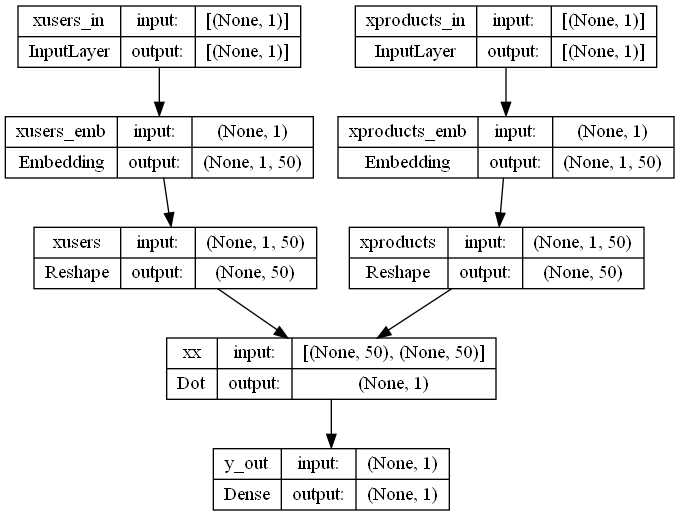

In [100]:
utils.plot_model(manCf, to_file='Manual_CF.png', show_shapes=True, show_layer_names=True)

Train / Test

In [101]:
'''
Plot loss and metrics of keras training.
'''
def utils_plot_keras_training(training):
    metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))
    
    ## training
    ax[0].set(title="Training")
    ax11 = ax[0].twinx()
    ax[0].plot(training.history['loss'], color='black')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss', color='black')
    for metric in metrics:
        ax11.plot(training.history[metric], label=metric)
    ax11.set_ylabel("Score", color='steelblue')
    ax11.legend()
    
    ## validation
    ax[1].set(title="Validation")
    ax22 = ax[1].twinx()
    ax[1].plot(training.history['val_loss'], color='black')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss', color='black')
    for metric in metrics:
        ax22.plot(training.history['val_'+metric], label=metric)
    ax22.set_ylabel("Score", color="steelblue")
    plt.show()

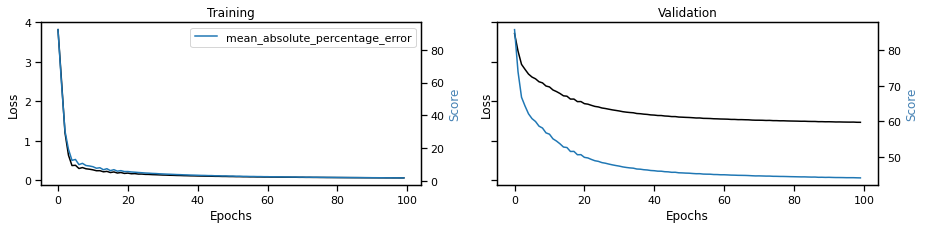

In [102]:
# train
#X_train = train[["user-id", 'restaurant-id']]

#gs_cf_man = GridSearchCV(model, param_grid, scoring='neg_mean_absolute_error', cv=10)
#gs_cf_man_result = gs_cf_man.fit(X=X_train, y=train["y"], shuffle=True, verbose=0, validation_split=0.3)

training = manCf.fit(x=[train["user-id"], train["restaurant-id"]], y=train["y"], epochs=100, batch_size=128, shuffle=True, verbose=0, validation_split=0.3)
manCf = training.model
utils_plot_keras_training(training)

In [103]:
# summarize results
# print("Best: %f using %s" % (gs_cf_man_result.best_score_, grid_result.best_params_))
# params = gs_cf_man_result.cv_results_['params']

In [104]:
# test
test["yhat"] = manCf.predict([test["user-id"], test["restaurant-id"]])
test

687/687 [==============================] - 2s 2ms/step


,user-id,restaurant-id,y,yhat
0,0,286.0,5.0,2.020010
1,1,252.0,4.0,3.021825
2,1,264.0,3.0,2.632966
3,1,285.0,4.0,3.871862
4,2,246.0,4.0,2.397324
...,...,...,...,...
21973,82311,263.0,5.0,3.182667
21974,82312,263.0,5.0,3.194134
21975,82313,263.0,5.0,3.719491
21976,82314,263.0,5.0,3.916766


Evaluate

In [105]:
# overall
y_test = test["y"]
predicted = test["yhat"]

print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", str(round(np.mean(np.abs((y_test-predicted)/predicted)), 2)))

Mean Absolute Error (Σ|y-pred|/n): 1
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.44


In [106]:
# Evaluate
def mean_reciprocal_rank(y_test, predicted):
    score = []
    for product in y_test:
        mrr = 1 / (list(predicted).index(product) + 1) if product in predicted else 0
        score.append(mrr)
    return np.mean(score)

In [107]:
# single case
i = 0
print("--- user", i, "---")

top = 5
y_test = test[test["user-id"]==i].sort_values("y", ascending=False)["restaurant-id"].values[:top]
print("y_test:", y_test)

predicted = test[test["user-id"]==i].sort_values("yhat", ascending=False)["restaurant-id"].values[:top]
print("predicted:", predicted)

true_positive = len(list(set(y_test) & set(predicted)))
print("true positive:", true_positive, "("+str(round(true_positive/top*100,1))+"%)")
print("accuracy:", str(round(metrics.accuracy_score(y_test,predicted)*100,1))+"%")
print("mrr:", round(mean_reciprocal_rank(y_test, predicted),2))

--- user 0 ---
y_test: [286.]
predicted: [286.]
true positive: 1 (20.0%)
accuracy: 100.0%
mrr: 1.0


<hr>

**b (3). NCF based recommendation system**
* A neural collaborative filtering recommender based on the above CB recommender with the addition of a nueral network

Data

In [108]:
train = dtf_train.stack(dropna=True).reset_index().rename(columns={0:"y"})
train.head()

,user-id,restaurant-id,y
0,0,3.0,3.0
1,0,11.0,4.0
2,0,22.0,4.0
3,0,100.0,5.0
4,0,111.0,4.0


In [109]:
test = dtf_test.stack(dropna=True).reset_index().rename(columns={0:"y"})
test.head()

,user-id,restaurant-id,y
0,0,286.0,5.0
1,1,252.0,4.0
2,1,264.0,3.0
3,1,285.0,4.0
4,2,246.0,4.0


Modeling

In [110]:
embeddings_size = 50
usr, prd = len(set(filtered_users_df['user-id'])) + 1, len(set(filtered_restaurant_df['num_id'])) + 1

# Input layer
xusers_in = layers.Input(name="xusers_in", shape=(1,))
xproducts_in = layers.Input(name="xproducts_in", shape=(1,))

# A) Matrix Factorization
## embeddings and reshape
cf_xusers_emb = layers.Embedding(name="cf_xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
cf_xusers = layers.Reshape(name='cf_xusers', target_shape=(embeddings_size,))(cf_xusers_emb)
## embeddings and reshape
cf_xproducts_emb = layers.Embedding(name="cf_xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
cf_xproducts = layers.Reshape(name='cf_xproducts', target_shape=(embeddings_size,))(cf_xproducts_emb)
## product
cf_xx = layers.Dot(name='cf_xx', normalize=True, axes=1)([cf_xusers, cf_xproducts])

# B) Neural Network
## embeddings and reshape
nn_xusers_emb = layers.Embedding(name="nn_xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
nn_xusers = layers.Reshape(name='nn_xusers', target_shape=(embeddings_size,))(nn_xusers_emb)
## embeddings and reshape
nn_xproducts_emb = layers.Embedding(name="nn_xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
nn_xproducts = layers.Reshape(name='nn_xproducts', target_shape=(embeddings_size,))(nn_xproducts_emb)
## concat and dense
nn_xx = layers.Concatenate()([nn_xusers, nn_xproducts])
nn_xx = layers.Dense(name="nn_xx", units=int(embeddings_size/2), activation='relu')(nn_xx)

# Merge A & B
y_out = layers.Concatenate()([cf_xx, nn_xx])
y_out = layers.Dense(name="y_out", units=1, activation='linear')(y_out)

# Compile
manNcf = models.Model(inputs=[xusers_in,xproducts_in], outputs=y_out, name="Neural_CollaborativeFiltering")
opt = Adam(learning_rate=0.001)
manNcf.compile(optimizer=opt, loss='mean_absolute_error', metrics=['mean_absolute_percentage_error'])
manNcf.summary()

Model: "Neural_CollaborativeFiltering"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 xusers_in (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 xproducts_in (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 nn_xusers_emb (Embedding)      (None, 1, 50)        4123750     ['xusers_in[0][0]']              
                                                                                                  
 nn_xproducts_emb (Embedding)   (None, 1, 50)        15000       ['xproducts_in[0][0]']           
                                                                      

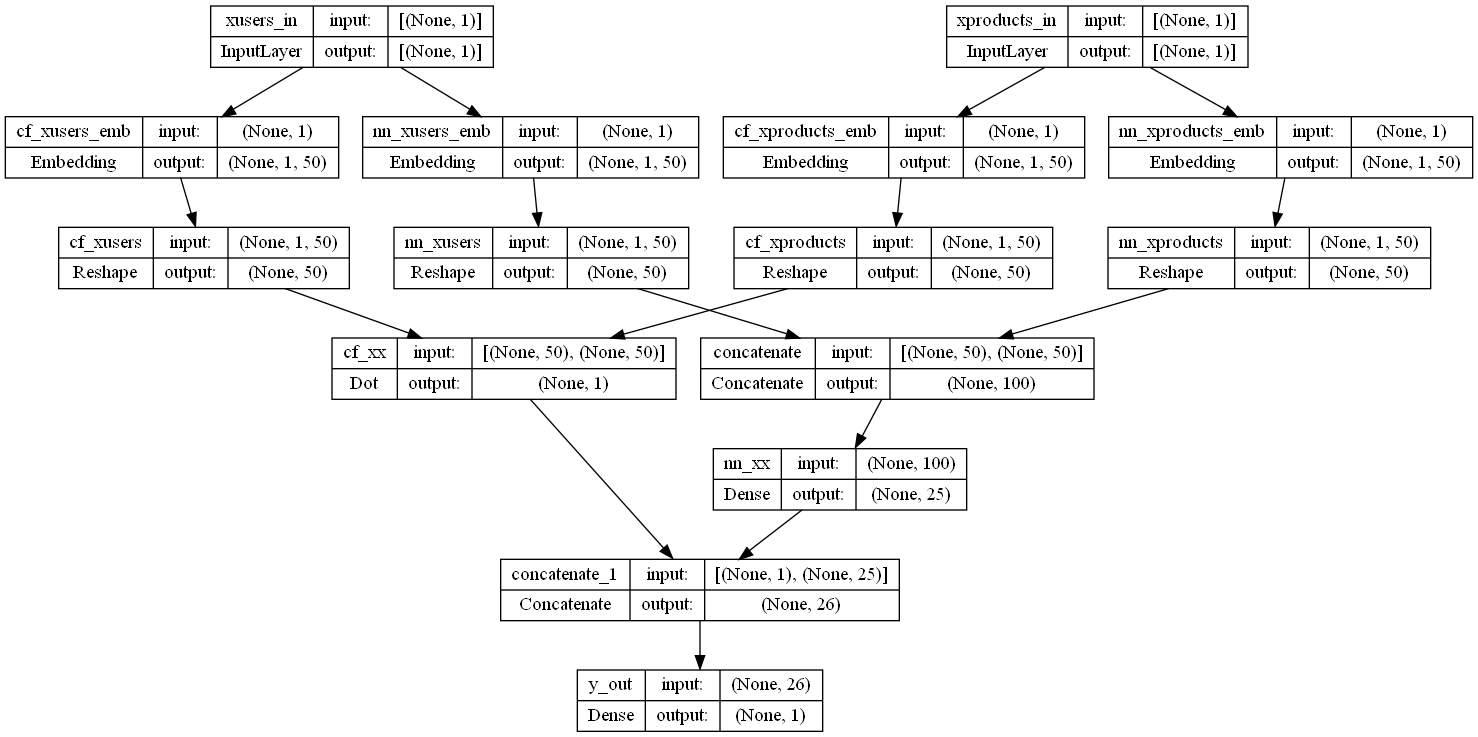

In [111]:
utils.plot_model(manNcf, to_file='Manual_NCF.png', show_shapes=True, show_layer_names=True)

Train/Test

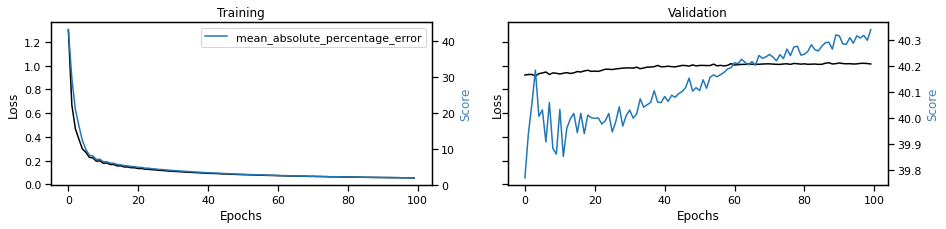

In [112]:
# train
training = manNcf.fit(x=[train["user-id"], train["restaurant-id"]], y=train["y"], epochs=100, batch_size=128, shuffle=True, verbose=0, validation_split=0.3)
manNcf = training.model
utils_plot_keras_training(training)

In [113]:
# test
test["yhat"] = manNcf.predict([test["user-id"], test["restaurant-id"]])
test

687/687 [==============================] - 1s 2ms/step


,user-id,restaurant-id,y,yhat
0,0,286.0,5.0,3.956185
1,1,252.0,4.0,4.058648
2,1,264.0,3.0,4.192744
3,1,285.0,4.0,4.287419
4,2,246.0,4.0,4.181037
...,...,...,...,...
21973,82311,263.0,5.0,3.612094
21974,82312,263.0,5.0,4.274398
21975,82313,263.0,5.0,3.862447
21976,82314,263.0,5.0,3.507124


Evaluation

In [114]:
# overall
y_test = test["y"]
predicted = test["yhat"]

print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", str(round(np.mean(np.abs((y_test-predicted)/predicted)), 2)))

Mean Absolute Error (Σ|y-pred|/n): 1
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.3


In [115]:
# single case
i = 1
print("--- user", i, "---")

top = 5
y_test = test[test["user-id"]==i].sort_values("y", ascending=False)["restaurant-id"].values[:top]
print("y_test:", y_test)

predicted = test[test["user-id"]==i].sort_values("yhat", ascending=False)["restaurant-id"].values[:top]
print("predicted:", predicted)

true_positive = len(list(set(y_test) & set(predicted)))
print("true positive:", true_positive, "("+str(round(true_positive/top*100,1))+"%)")
print("accuracy:", str(round(metrics.accuracy_score(y_test,predicted)*100,1))+"%")
print("mrr:", round(mean_reciprocal_rank(y_test, predicted),2))

--- user 1 ---
y_test: [252. 285. 264.]
predicted: [285. 264. 252.]
true positive: 3 (60.0%)
accuracy: 0.0%
mrr: 0.61


<hr>

**b (4). Fast ai NCF recommendation system**

Just like in surprise, fast ai also has models that can be used for collaborative filtering the model below is an example of their Neural Collab Filtering model to compete with our manual mode made above

<br>
Data

In [116]:
workingUsers = filtered_users_df[['user-id', 'restaurant-id', 'y']].copy()

In [117]:
from fastai.collab import *
from fastai.tabular.all import *

In [118]:
data = CollabDataLoaders.from_df(workingUsers, valid_pct=0.1, bs=128)
data.show_batch()

,user-id,restaurant-id,y
0,17892,250.0,4.0
1,71143,119.0,3.0
2,49766,90.0,5.0
3,41177,10.0,3.0
4,4379,3.0,5.0
5,35200,253.0,5.0
6,30272,151.0,4.0
7,32407,151.0,4.0
8,20498,48.0,4.0
9,6676,63.0,1.0


Model

In [119]:
n_users = len(set(filtered_users_df['user-id'])) + 1
n_rest = len(set(filtered_restaurant_df['num_id'])) + 1
n_factors = 5

user_factors = torch.randn(n_users, n_factors)
rest_factors = torch.randn(n_rest, n_factors)

In [120]:
class DotProductBias(Module):
    def __init__(self, n_users, n_rest, n_factors, y_range=(0,5.5)):
        self.user_factors = Embedding(n_users, n_factors)
        self.user_bias = Embedding(n_users, 1)
        self.rest_factors = Embedding(n_rest, n_factors)
        self.rest_bias = Embedding(n_rest, 1)
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors(x[:,0])
        rest = self.rest_factors(x[:,1])
        res = (users * rest).sum(dim=1, keepdim=True)
        res += self.user_bias(x[:,0]) + self.rest_bias(x[:,1])
        return sigmoid_range(res, *self.y_range)

In [121]:
x, y = data.one_batch()
x.shape

torch.Size([128, 2])

SuggestedLRs(valley=0.033113110810518265)

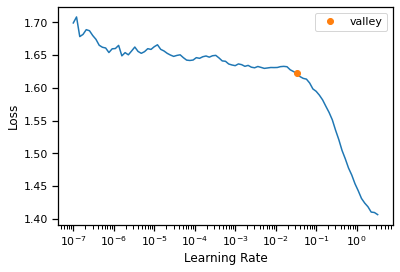

In [122]:
model = DotProductBias(n_users, n_rest, 50)
learn = Learner(data, model, loss_func=L1LossFlat(reduction='mean'))
init_loss = learn.loss_func(learn.model(x), y)
learn.lr_find()

Evaluate

In [123]:
learn.fit_one_cycle(10, 0.1445, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.853065,0.858958,00:42
1,0.949000,0.952628,00:50
2,0.968999,0.962365,01:05
3,0.960704,0.947035,01:05
4,0.919246,0.932256,01:03
5,0.896421,0.906798,01:00
6,0.852267,0.854856,00:57
7,0.797985,0.837292,00:52
8,0.602371,0.851037,00:52
9,0.424011,0.854120,00:42


In [124]:
final_loss = learn.loss_func(learn.model(x), y)
final_loss

TensorBase(0.3187, grad_fn=<AliasBackward0>)

In [125]:
assert final_loss < init_loss, (final_loss,init_loss)

Model (2)

In [126]:
learn = collab_learner(data, n_factors=50, y_range=[0, 5.5], loss_func=L1LossFlat(), wd=.1)
init_loss = learn.loss_func(learn.model(x), y)

SuggestedLRs(valley=0.0691830962896347)

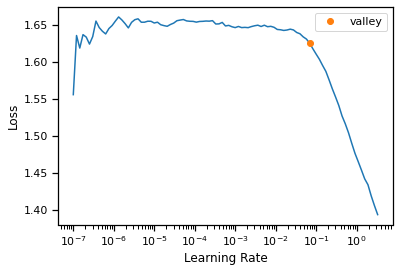

In [127]:
learn.lr_find()
#learn.recorder.plot_lr_find()

Evaluate

In [128]:
learn.fit_one_cycle(10, 0.048)

epoch,train_loss,valid_loss,time
0,0.851435,0.858717,00:42
1,0.825395,0.859049,00:47
2,0.836079,0.864529,01:10
3,0.827749,0.857151,01:09
4,0.816718,0.853613,00:59
5,0.776608,0.854741,00:55
6,0.671586,0.859741,00:50
7,0.550794,0.860817,00:47
8,0.401651,0.864460,00:38
9,0.304958,0.867550,00:36


In [129]:
final_loss = learn.loss_func(learn.model(x), y)

In [130]:
final_loss

TensorBase(0.2638, grad_fn=<AliasBackward0>)

In [131]:
assert final_loss < init_loss, (final_loss,init_loss)

In [132]:
print(x, y)

tensor([[40469,     5],
        [13887,   275],
        [21325,   103],
        [42418,    54],
        [62242,   284],
        [53080,     8],
        [ 4736,     4],
        [29034,   218],
        [  804,    12],
        [ 8635,   250],
        [62087,    71],
        [60751,    81],
        [27643,    27],
        [ 7347,   110],
        [50145,   166],
        [ 1440,     4],
        [13959,   136],
        [14132,    46],
        [52171,   167],
        [16910,    60],
        [ 1435,   120],
        [ 6922,   266],
        [42010,   265],
        [ 2700,    85],
        [64378,   124],
        [33243,   253],
        [22954,   286],
        [ 9227,   114],
        [48107,   114],
        [ 9636,   296],
        [47007,   100],
        [30056,   152],
        [ 3558,   112],
        [31806,   254],
        [33939,   214],
        [40984,    47],
        [ 6991,   121],
        [18169,    87],
        [57353,   215],
        [72707,   260],
        [16738,   275],
        [ 1857, 

In [133]:
for row in workingUsers[workingUsers['user-id'] == 23227].iterrows():
    print(row)

(25997, user-id          23227.0
restaurant-id      102.0
y                    4.0
Name: 25997, dtype: float64)
(54925, user-id          23227.0
restaurant-id      291.0
y                    4.0
Name: 54925, dtype: float64)


In [134]:
user = torch.tensor([[23227, 291]])
pred = learn.model(user)
print(f'{pred[0]}')
                     

3.6082675457000732


<hr>

# 5. Overall Evaluation

<p>The surprise model achieved an M.A.E of 0.8420, which is a reasonably good score. The M.A.E measures the average absolute difference between the predicted ratings and the actual ratings, so a lower M.A.E value indicates better performance.

The manual collaborative filtering model achieved an M.A.E of 1. This indicates that this model is not as effective at predicting ratings as the surprise model and fast ai neural collaborative filtering models.

The manual neural collaborative filtering model also achieved an M.A.E of 1. This suggests that it is not as effective at predicting ratings as the surprise model and fast ai neural collaborative filtering models.

The fast ai neural collaborative filtering model achieved an M.A.E of 0.31 on the training set and 0.8391 on the validation set. The low M.A.E score on the training set indicates that the model was able to fit the training data very well. The higher M.A.E score on the validation set suggests that the model was able to generalize well to new data, as it was not overfitting to the training data.

Overall, based on the performance scores provided, it seems that the fast ai neural collaborative filtering model was the best-performing model among the models evaluated. It achieved the lowest M.A.E score and was able to fit the training data well while also generalizing well to new data</p>

<table>
<tr>
<th>Model Name</th>
<th>Mean Absolute Error</th>
</tr>
<tr>
<td>surprise</td>
<td>0.8420</td>
</tr>
<tr>
<td>Traditional collaborative filtering model </td>
<td>1.000</td>
</tr>
<tr>
<td>fast ai neural collaborative filtering</td>
<td>0.310</td>
</tr>
<tr>

</table>

**Hybrid recommendation system**

* In this section, will try to build a hybrid recommender that brings together techniques we have implemented in the content based and collaborative filter based models.

In [135]:
id_map = pd.read_csv('restaurant_data.csv')
id_map.drop_duplicates(subset=['Restaurant ID'], inplace=True)
len(id_map)

435

***Surprise model***

In [136]:
def hybrid_recommender(userId, description):
    rest = contentB_recommend(description)
    # print(rest)
    # display('Prior to personal recommendations: ', rest.head(10))
    rest['est'] = rest['num_id'].apply(lambda x: svd.predict(userId, x).est)
    rest = rest.sort_values('est', ascending=False)
    return rest

In [137]:
hybrid_recommender(1, 'good korean with delivery')

Processed user feedback: good korean delivery


,name,rating,location,price,cuisine,transactions,comments,similarity,id,num_id,est
48,mokyo,4,new york,low,korean,"delivery, pickup","some hits and some misses - the gumbo and rice with octopus were both pretty salty, and the yellowtail crudo could've used a little more seasoning on the fish itself instead of on top of it. the favorite of the night was the corn dumplings! super interesting and different",0.172740,e5wK3I_THzF4Ce_OgoSCQw,32,4.514484
71,c as in charlie,4,new york,low,korean,,"overall great experience. food was tasty, service was warm and attentive, ambitious was trendy. a perfect quick bite/drink place to start bar/appetizer hopping. would love to see more items adding to the menu.",0.183881,pZWhRtCJvTuwWoavaiCQrA,50,4.497300
10,ariari,5,new york,low,korean,,"this place is amazing. great service, kind staff, amazing food. the drinks are delicious as well as the dishes. 10/10 recommend. you must try the corn crème brûlée!",0.210675,nMyot99PkX5iYCdxHoRJqQ,9,4.461155
47,atti,4,brooklyn,pricey-dining,korean,"delivery, pickup","went here with a party of six. as soon as we entered, we were immediately offered a table. our server was good- he is an expert at the menu and selling us--no kidding. we had no idea what dishes would be appropriate for the occasion, but he simply went to buy some samples and explained which ones were which, as well as which ones he loved and recommended. although it's not our first time doing korean barbecue, it is our first time here, and when we informed him of this, he helped us incredibly by making food suggestions and by keeping a close check on us so we could report on the cuisine. ...",0.208307,mnXrPqOVbX_06D9OAo4dLA,31,4.328059
56,nowon,5,new york,mid-range,korean,"pickup, delivery",the outdoor seating area has an extremely retro vibe with neon lights and vintage posters!,0.225290,LMyvruexOQzzHQrAgbdqiA,37,4.324095
2,ye's apothecary,5,new york,mid-range,szechuan,,"good food, good service and good vibe. drinks have some chinese twists. highly recommend!",0.206628,8YWLuLUKj0t_0_Xv06UUtw,2,4.323539
145,dumpling n' dips,3,new york,popular-eats,dim sum,"delivery, pickup",my first time to try dumplings in thai taste with 4 kinds of dipping sauce food is so good and reasonable price . nice decoration good to try when you visit this area . good food and good service staff is very nice and friendly. must try !!,0.184471,qvX5If0CwM1RGzP3ie4SKA,99,4.271850
212,naro,5,new york,pricey-dining,korean,,"came here for our engagement anniversary dinner. naro is a new korean fine dining restaurant that has been around since october. it's on the rink level of the rockefeller center and you can get here by stairs/ via an elevator located on 49th st. the staff is eager and knowledgeable, and we incorporated all our server's recommendations and weren't disappointed. we had the standard as well as the vegetarian chef's tatsting menu to get more variety. there's a beverage pairing option as well. the dishes were very innovative and well made. as expected for korean food, the flavors are really sub...",0.276632,OFc7aHP1chwqXTgtYtbJzQ,149,4.119261
226,gunbae tribeca,4,new york,low,korean,"delivery, pickup, restaurant_reservation",came here with a large group and was throughly impressed with their ability to serve us all so efficiently. robin was our main server and cooked most of our meat. she made the experience 5 stars instead of 4 because she was so personable. she even threw some kimchi on the grill for us which i've never had. it was even better off the grill! we got one of the combos and tried multiple cuts of meat. the food was good and the ambiance was fun for the group. my favorite side was the soup with beef and tofu--great flavors. only downfall (in my opinion) is every inch of my clothing smelling like ...,0.208707,0GN6l4FAknTFSWZhEan45A,158,4.018690
303,k'ook,4,new york,low,korean,"pickup, delivery",recently went again and their happy hour deals/lunch special are amazing!!! kimchi jigae is $12 and t

In [138]:
hybrid_recommender(0, 'burgers in new york')

Processed user feedback: burger


,name,rating,location,price,cuisine,transactions,comments,similarity,id,num_id,est
231,bites of xi'an,3,new york,low,burgers,"delivery, pickup","amazing place, noodles are full of flavor and the perfect chewy texture. you get to choose between the regular hand pulled noodles or thick style. plenty of seating, and it appears they take lots of take out orders as well. prices are beyond reasonable for the portion you get, i was perfectly satisfied after finishing my bowl.",0.150240,--SoNTeCXFUx56no0OgibQ,161,4.581137
370,7th street burger,4,new york,low,burgers,"pickup, delivery",my brother claimed this the best burger of nyc! we got the loaded fries and double burgers again. phenomenal!!,0.639077,VVYea3NzbklOyHEzSEavWw,234,4.560443
430,virginia's,5,new york,low,american (traditional),,"banana pudding and molten chocolate cake are the best i've ever had. burger (wife loved), fries, bread, brussels, crab cake (wife, duh) all excellent.",0.179401,jlbtOUU-dmPwLwSYXal2oQ,270,4.510162
411,kings of kobe,4,new york,low,burgers,"delivery, pickup",the kings of kobe was a great burger place and the food was amazingly tasty and delicious and with out a doubt the best place for burgers i believe everyone should go there for a great time. the service was great and no problems and the ambiance was great. i would recommend this place to all families and friends.,0.486944,H26qMBb0OFNn2xmSTM1Phw,259,4.464905
239,macao trading company,5,new york,mid-range,asian fusion,"delivery, pickup","just come for the drinks and bar. cocktails so tasty - drunken dragons milk is so sweet and creamy with coconut milk and green tea vodka, etc. great service and bar area. the food itself though was very average and overpriced. burger was cooked perfectly and very tasty. but both the burger and noodles pretty average and way overpriced for what they were",0.268988,U74_3F7r3tMhd6dmTmDBxQ,166,4.306542
301,miznon,4,new york,low,mediterranean,"pickup, delivery","my favorite burger place!! very close to 7th st burger in manhattan. the flavors blend amazingly with garlic sauce, the mountain of cheese, and very crispy pickles!! the pita is also very very fluffy but wasn't soggy. the service is very nice and they clean up after you!",0.349420,kTQ0rRfgtlPwX9_O8OY_UA,202,4.249369
449,leyla,4,new york,low,turkish,"delivery, pickup",amazing atmosphere cute place with lots of decoration great seating but do make a reservation. greek type of food i got the lamb burger. and it was cooked perfectly with seasoned fries everything was delicious great waitress . everyone loved there meals,0.188374,goKn7tKTIqpNPM_jR2yRCg,283,4.201402
389,the hihi room,4,new york,low,burgers,"pickup, delivery","i dislike veggie burgers. but they have an amazing veggie burger. basically, everything on the menu is amazing. damn, on my way right now.",0.589443,QyB52nUrwJRY0ipuwcfR_A,246,4.173152
240,monkey bar,2,new york,low,american (traditional),,"this is probably the best burger i've ever had. i understand the price of the place is about the ambiance, service, and quality, and it definitely held up. the burger was cooked a perfect medium rare / medium and was so juicy. my friend ordered the red sauce paste and the pasta was cooked absolutely perfectly and was so delicious. she ordered the half order of the pasta and the chef gave us the other half on the house! worth the experience and the everything we got was delicious.",0.259742,gZz9A8k8ORC_xl0aHxtY4w,167,4.054294
176,emily - west village,5,new york,low,pizza,"delivery, pickup","service and staff is a little disorganized but the food makes up for it. we started our dinner with the brussels sprouts salad which was excellent, then the luca pizza and the burger. one of the best burgers in town, hands down! i will definitely go back to try the other pizzas on the menu. ended the meal with banana pudding, so rich and a texture you can't find anywhere else.",0.270227,m86CNmYThtzzWB3nPnrhbg,121,3.641941


In [139]:
def truncate(n, decimals=1):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier

***Fast AI Model***

In [140]:
def hybrid_recommender_fastAI(userId, description):
    rest = contentB_recommend(description)
    # print(rest)
    # display('Prior to personal recommendations: ', rest.head(10))
    rest['est'] = rest['num_id'].apply(lambda x: truncate(learn.model(torch.tensor([[userId, x]]))))
    rest = rest.sort_values('est', ascending=False)
    return rest.head(10)

In [141]:
hybrid_recommender_fastAI(1, 'good korean with delivery')

Processed user feedback: good korean delivery


,name,rating,location,price,cuisine,transactions,comments,similarity,id,num_id,est
2,ye's apothecary,5,new york,mid-range,szechuan,,"good food, good service and good vibe. drinks have some chinese twists. highly recommend!",0.206628,8YWLuLUKj0t_0_Xv06UUtw,2,4.5
145,dumpling n' dips,3,new york,popular-eats,dim sum,"delivery, pickup",my first time to try dumplings in thai taste with 4 kinds of dipping sauce food is so good and reasonable price . nice decoration good to try when you visit this area . good food and good service staff is very nice and friendly. must try !!,0.184471,qvX5If0CwM1RGzP3ie4SKA,99,4.2
47,atti,4,brooklyn,pricey-dining,korean,"delivery, pickup","went here with a party of six. as soon as we entered, we were immediately offered a table. our server was good- he is an expert at the menu and selling us--no kidding. we had no idea what dishes would be appropriate for the occasion, but he simply went to buy some samples and explained which ones were which, as well as which ones he loved and recommended. although it's not our first time doing korean barbecue, it is our first time here, and when we informed him of this, he helped us incredibly by making food suggestions and by keeping a close check on us so we could report on the cuisine. ...",0.208307,mnXrPqOVbX_06D9OAo4dLA,31,4.1
56,nowon,5,new york,mid-range,korean,"pickup, delivery",the outdoor seating area has an extremely retro vibe with neon lights and vintage posters!,0.225290,LMyvruexOQzzHQrAgbdqiA,37,4.0
212,naro,5,new york,pricey-dining,korean,,"came here for our engagement anniversary dinner. naro is a new korean fine dining restaurant that has been around since october. it's on the rink level of the rockefeller center and you can get here by stairs/ via an elevator located on 49th st. the staff is eager and knowledgeable, and we incorporated all our server's recommendations and weren't disappointed. we had the standard as well as the vegetarian chef's tatsting menu to get more variety. there's a beverage pairing option as well. the dishes were very innovative and well made. as expected for korean food, the flavors are really sub...",0.276632,OFc7aHP1chwqXTgtYtbJzQ,149,3.9
10,ariari,5,new york,low,korean,,"this place is amazing. great service, kind staff, amazing food. the drinks are delicious as well as the dishes. 10/10 recommend. you must try the corn crème brûlée!",0.210675,nMyot99PkX5iYCdxHoRJqQ,9,3.8
226,gunbae tribeca,4,new york,low,korean,"delivery, pickup, restaurant_reservation",came here with a large group and was throughly impressed with their ability to serve us all so efficiently. robin was our main server and cooked most of our meat. she made the experience 5 stars instead of 4 because she was so personable. she even threw some kimchi on the grill for us which i've never had. it was even better off the grill! we got one of the combos and tried multiple cuts of meat. the food was good and the ambiance was fun for the group. my favorite side was the soup with beef and tofu--great flavors. only downfall (in my opinion) is every inch of my clothing smelling like ...,0.208707,0GN6l4FAknTFSWZhEan45A,158,3.8
71,c as in charlie,4,new york,low,korean,,"overall great experience. food was tasty, service was warm and attentive, ambitious was trendy. a perfect quick bite/drink place to start bar/appetizer hopping. would love to see more items adding to the menu.",0.183881,pZWhRtCJvTuwWoavaiCQrA,50,3.8
48,mokyo,4,new york,low,korean,"delivery, pickup","some hits and some misses - the gumbo and rice with octopus were both pretty salty, and the yellowtail crudo could've used a little more seasoning on the fish itself instead of on top of it. the favorite of the night was the corn dumplings! super interesting and different",0.172740,e5wK3I_THzF4Ce_OgoSCQw,32,3.6
303,k'ook,4,new york,low,korean,"pickup, delivery",recently went again and their happy hour deals/lunch special are amazing!!! kimchi jigae is $12 and the korean fried chicken wings w fries is also

In [142]:
hybrid_recommender_fastAI(0, 'burgers in new york')

Processed user feedback: burger


,name,rating,location,price,cuisine,transactions,comments,similarity,id,num_id,est
239,macao trading company,5,new york,mid-range,asian fusion,"delivery, pickup","just come for the drinks and bar. cocktails so tasty - drunken dragons milk is so sweet and creamy with coconut milk and green tea vodka, etc. great service and bar area. the food itself though was very average and overpriced. burger was cooked perfectly and very tasty. but both the burger and noodles pretty average and way overpriced for what they were",0.268988,U74_3F7r3tMhd6dmTmDBxQ,166,4.1
301,miznon,4,new york,low,mediterranean,"pickup, delivery","my favorite burger place!! very close to 7th st burger in manhattan. the flavors blend amazingly with garlic sauce, the mountain of cheese, and very crispy pickles!! the pita is also very very fluffy but wasn't soggy. the service is very nice and they clean up after you!",0.349420,kTQ0rRfgtlPwX9_O8OY_UA,202,3.8
240,monkey bar,2,new york,low,american (traditional),,"this is probably the best burger i've ever had. i understand the price of the place is about the ambiance, service, and quality, and it definitely held up. the burger was cooked a perfect medium rare / medium and was so juicy. my friend ordered the red sauce paste and the pasta was cooked absolutely perfectly and was so delicious. she ordered the half order of the pasta and the chef gave us the other half on the house! worth the experience and the everything we got was delicious.",0.259742,gZz9A8k8ORC_xl0aHxtY4w,167,3.7
449,leyla,4,new york,low,turkish,"delivery, pickup",amazing atmosphere cute place with lots of decoration great seating but do make a reservation. greek type of food i got the lamb burger. and it was cooked perfectly with seasoned fries everything was delicious great waitress . everyone loved there meals,0.188374,goKn7tKTIqpNPM_jR2yRCg,283,3.7
411,kings of kobe,4,new york,low,burgers,"delivery, pickup",the kings of kobe was a great burger place and the food was amazingly tasty and delicious and with out a doubt the best place for burgers i believe everyone should go there for a great time. the service was great and no problems and the ambiance was great. i would recommend this place to all families and friends.,0.486944,H26qMBb0OFNn2xmSTM1Phw,259,3.6
389,the hihi room,4,new york,low,burgers,"pickup, delivery","i dislike veggie burgers. but they have an amazing veggie burger. basically, everything on the menu is amazing. damn, on my way right now.",0.589443,QyB52nUrwJRY0ipuwcfR_A,246,3.5
176,emily - west village,5,new york,low,pizza,"delivery, pickup","service and staff is a little disorganized but the food makes up for it. we started our dinner with the brussels sprouts salad which was excellent, then the luca pizza and the burger. one of the best burgers in town, hands down! i will definitely go back to try the other pizzas on the menu. ended the meal with banana pudding, so rich and a texture you can't find anywhere else.",0.270227,m86CNmYThtzzWB3nPnrhbg,121,3.4
370,7th street burger,4,new york,low,burgers,"pickup, delivery",my brother claimed this the best burger of nyc! we got the loaded fries and double burgers again. phenomenal!!,0.639077,VVYea3NzbklOyHEzSEavWw,234,3.3
430,virginia's,5,new york,low,american (traditional),,"banana pudding and molten chocolate cake are the best i've ever had. burger (wife loved), fries, bread, brussels, crab cake (wife, duh) all excellent.",0.179401,jlbtOUU-dmPwLwSYXal2oQ,270,3.3
231,bites of xi'an,3,new york,low,burgers,"delivery, pickup","amazing place, noodles are full of flavor and the perfect chewy texture. you get to choose between the regular hand pulled noodles or thick style. plenty of seating, and it appears they take lots of take out orders as well. prices are beyond reasonable for the portion you get, i was perfectly satisfied after finishing my bowl.",0.150240,--SoNTeCXFUx56no0OgibQ,161,2.9


<hr>

# 6. Conclusion & Recommendations

<strong>Conclusion:</strong>
<p>Based on the performance scores provided, the fast ai neural collaborative filtering model appears to be the best-performing model among those evaluated for collaborative filtering. This model achieved the lowest M.A.E score (0.310) and was able to fit the training data well while also generalizing well to new data. For very active users, we recommend combining the fast ai neural collaborative filtering model with the content-based model to build a hybrid recommender system that leverages both collaborative filtering and content-based approaches. For less active or new users, we recommend using only the content-based model to provide recommendations.</p>

<strong>Recommendations:<strong>

<ul>
    <li>When combining the fast ai neural collaborative filtering model with the content-based model, consider using a weighted approach that takes into account the strengths and weaknesses of each model, as well as the preferences of your users. For example, you may want to give more weight to the collaborative filtering model for users who are highly engaged with your platform, while giving more weight to the content-based model for users who are less active or new to the platform.</li>
    <li>Consider conducting A/B testing to evaluate the performance of the hybrid recommender system compared to the individual models. This can help you determine the optimal approach for providing recommendations to your users.</li>
</ul>

<strong>Future works:<strong>
<ul>
    <li>In addition to the models evaluated you may want to explore knowledge-based recommenders, which can be particularly effective in domains where user preferences are highly influenced by specific attributes or features of restaurants.</li>
    <li>Finally, continue to monitor the performance of your recommender system over time and iterate as necessary to improve its accuracy and effectiveness. This may involve collecting additional data, retraining models, or adjusting the weighting of different models in your hybrid approach.</li>
</ul>

### Saving the models

In [143]:
# dump of the content based recommender func
pickle.dump(contentB_recommend, open('content_base_r.pkl', 'wb'))

In [144]:
# create an iterator object with write permission - model.pkl
import dill as pickle


#with open('ncf_model_pkl', 'wb') as files:
#    pickle.dump(hybrid_recommender_manNCF, files)
    
with open('fastAI_model_pkl', 'wb') as files:
    pickle.dump(hybrid_recommender_fastAI, files)

# dump of the wards' list
pickle.dump(constituents_list,open('wards.pkl','wb'))

# dump of the collaborative model
pickle.dump(model,open('svd.pkl','wb'))

# dump of the sentence processor func
pickle.dump(process_sentences, open('sentence_processor.pkl','wb'))

# dump of the price mapping
pickle.dump(price_map,open('prices.pkl','wb'))


In [145]:
# dump of the restaurant df
# pickle.dump(filtered_restaurant_df,open('restaurants.pkl','wb'))
pd.to_pickle(filtered_restaurant_df, "restaurants.pkl")

In [146]:
# dump of the hybrid model func
with open('svd_model_pkl', 'wb') as files:
    pickle.dump(hybrid_recommender, files)